Code: https://www.kaggle.com/code/joshuaswords/awesome-eda-2021-happiness-population

1. Thấp nhất?
2. Cao nhất = Thường xuyên xảy ra nhất?
3. Trung bình là bao nhiêu trên cả nước?
4. Có sự thay đổi tích cực hay tiêu cực qua thời gian không?
5. Phương sai, độ lệch chuẩn, p_vale - correlation giữa các biến trong cùng một metrics.
6. Xem xét giá trị ngoại lai (sự không ổn định)


## Library and functions

In [1]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import re

In [3]:
clcc = pd.read_excel('/content/Book1.xlsx', header=0)
clcc.head(5)

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
0,Một số chỉ tiêu về tai nạn giao thôn...,TỔNG SỐ,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.457,NaN
1,Một số chỉ tiêu về tai nạn giao thôn...,Đồng bằng sông Hồng,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.862,NaN
2,Một số chỉ tiêu về tai nạn giao thôn...,Hà Nội,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812,NaN
3,Một số chỉ tiêu về tai nạn giao thôn...,Vĩnh Phúc,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN
4,Một số chỉ tiêu về tai nạn giao thôn...,Bắc Ninh,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,NaN


In [4]:
def pannel_bar_plot(df, show_value, sub_feature, years, title):
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))
    one_year = True if len(years) == 1 else False
    for i, year in enumerate(years):
        if sub_feature is None:
            value = df[year]
            value.index = df.Province

        else:
            value = df[df.Sub_Feature == sub_feature][year]
            value.index = df[df.Sub_Feature == sub_feature].Province

        value = value[::-1]
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)

            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)

            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')

    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()




def average_describe(df, is_Province, sub_feature, years):
    if is_Province:
        df = df[df.Province.isin(province_name_preprocessed)]
    else:
        df = df[df.Province.isin(vung_mien_name_preprocessed)]
    if sub_feature is not None:
        min_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmin()
        max_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmax()
        print(df[df.Sub_Feature == sub_feature][years].mean(axis=1).describe())
        print(df.loc[min_value].Province, df.loc[max_value].Province)
    else:
        min_value = df[years].mean(axis=1).idxmin()
        max_value = df[years].mean(axis=1).idxmax()
        print(df[years].mean(axis=1).describe())
        print(df.loc[min_value].Province, " | ", df.loc[max_value].Province)




def report_p(df, sub_feature, years, title):
    #pannel_bar_plot(df[df.Province.isin(province_name_preprocessed)], False, sub_feature, years, title)
    #pannel_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], True, sub_feature, years, title)
    print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    #print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 THẤP NHẤT: \n")
    top_k_province_worst_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 CAO NHẤT: \n")
    top_k_province_best_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    #average_describe(df, True, sub_feature, years)
    #average_describe(df, False, sub_feature, years)

def report_vm(df, sub_feature, years, title):
    #pannel_bar_plot(df[df.Province.isin(province_name_preprocessed)], False, sub_feature, years, title)
    #pannel_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], True, sub_feature, years, title)
    #print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 THẤP NHẤT: \n")
    top_k_province_worst_sub_feature(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 CAO NHẤT: \n")
    top_k_province_best_sub_feature(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years)
    #average_describe(df, True, sub_feature, years)
    #average_describe(df, False, sub_feature, years)


In [5]:
non_province = ['CẢ NƯỚC', 'Đồng bằng sông Hồng',
                'Hà Tây', 'Trung du và miền núi phía Bắc',
                'Bắc Trung Bộ và duyên hải miền Trung',
                'Tây Nguyên', 'Đông Nam Bộ', 'Đồng bằng sông Cửu Long']
non_province_preprocessed = ['ca nuoc',
            'dong bang song hong',
            'ha tay',
            'trung du va mien nui phia bac',
            'bac trung bo va duyen hai mien trung',
            'tay nguyen',
            'dong nam bo',
            'dong bang song cuu long']


cluster_province = {
    'DBSH': ["Hà Nội", "Vĩnh Phúc","Bắc Ninh","Quảng Ninh","Hải Dương","Hải Phòng","Hưng Yên","Thái Bình","Hà Nam","Nam Định","Ninh Bình"],
    'TDMNPB': ["Hà Giang","Cao Bằng","Bắc Kạn","Tuyên Quang","Lào Cai","Yên Bái","Thái Nguyên","Lạng Sơn","Bắc Giang","Phú Thọ","Điện Biên","Lai Châu","Sơn La","Hòa Bình"],
    'BTBDHMT': ["Thanh Hóa", "Nghệ An", "Hà Tĩnh", "Quảng Bình", "Quảng Trị", "Thừa Thiên - Huế", "Đà Nẵng", "Quảng Nam", "Quảng Ngãi", "Bình Định", "Phú Yên", "Khánh Hòa", "Ninh Thuận", "Bình Thuận"],
    'TN': ["Kon Tum","Gia Lai","Đắk Lắk","Đắk Nông","Lâm Đồng"],
    'DNB': ["Bình Phước","Tây Ninh","Bình Dương","Đồng Nai","Bà Rịa - Vũng Tàu","TP. Hồ Chí Minh"],
    'DBSCL': ["Long An","Tiền Giang","Bến Tre","Trà Vinh","Vĩnh Long","Đồng Tháp","An Giang","Kiên Giang","Cần Thơ","Hậu Giang","Sóc Trăng","Bạc Liêu","Cà Mau"]
}
cluster_province_preprocessed = {
        'Đồng bằng sông Hồng': ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong','hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh'],
        'Trung du và miền núi phía Bắc': ['ha giang','cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son','bac giang','phu tho','dien bien','lai chau','son la','hoa binh'],
        'Bắc Trung Bộ và duyên hải miền Trung': ['thanh hoa','nghe an','ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai','binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan'],
        'Tây Nguyên': ['kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong'],
        'Đông Nam Bộ': ['binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau','tp.ho chi minh'],
        'Đồng bằng sông Cửu Long': ['long an','tien giang','ben tre','tra vinh','vinh long','dong thap','an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']
        }


vung_mien_name = ['Đồng bằng sông Hồng',
             'Trung du và miền núi phía Bắc',
             'Bắc Trung Bộ và duyên hải miền Trung',
             'Tây Nguyên', 'Đông Nam Bộ', 'Đồng bằng sông Cửu Long']
vung_mien_name_preprocessed = ['dong bang song hong',
            'trung du va mien nui phia bac',
            'bac trung bo va duyen hai mien trung',
            'tay nguyen',
            'dong nam bo',
            'dong bang song cuu long']


province_name = ['Hà Nội', 'Vĩnh Phúc', 'Bắc Ninh', 'Quảng Ninh', 'Hải Dương',
       'Hải Phòng', 'Hưng Yên', 'Thái Bình', 'Hà Nam', 'Nam Định',
       'Ninh Bình', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang',
       'Lào Cai', 'Yên Bái', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang',
       'Phú Thọ', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Hòa Bình',
       'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị',
       'Thừa Thiên Huế', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi',
       'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận',
       'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng',
       'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai',
       'Bà Rịa - Vũng Tàu', 'TP.Hồ Chí Minh', 'Long An', 'Tiền Giang',
       'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp', 'An Giang',
       'Kiên Giang', 'Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu',
       'Cà Mau']
province_name_preprocessed = ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong',
        'hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh','ha giang',
        'cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son',
        'bac giang','phu tho','dien bien','lai chau','son la','hoa binh','thanh hoa','nghe an',
        'ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai',
        'binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan','kon tum','gia lai','dak lak',
        'dak nong','lam dong','binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau',
        'tp.ho chi minh','long an','tien giang','ben tre','tra vinh','vinh long','dong thap',
        'an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']




In [6]:
# def preprocess_cluster_province(cluster_province):
#     processed_clusters = {}
#     for cluster, provinces in cluster_province.items():
#         processed_provinces = preprocess_list(provinces)
#         processed_clusters[cluster] = processed_provinces
#     return processed_clusters
# preprocess_cluster_province(cluster_province)

In [7]:
def clean_province(province):
    # [- & space]+ => " "
    cleaned = re.sub(r'[-\s]+', ' ', province).strip()
    return cleaned

In [8]:
def preprocess_list(lst):
    lst = [unidecode(i).lower().strip() for i in lst]
    lst = [clean_province(i) for i in lst]
    return lst

In [9]:
## find cluster with province
def find_cluster(province):
    for key, value in cluster_province_preprocessed.items():
        if province in value:
            return key

In [10]:
# def preprocess_df(df, feature, vung_mien_name, province_name):
#     df = df[df.Main_Feature == feature]
#     lst_vm_p = vung_mien_name + province_name
#     lst_vm_p = [unidecode(i).lower().strip() for i in lst_vm_p]
#     lst_vm_p = [clean_province(i) for i in lst_vm_p]
#     df['Province'] = df['Province'].apply(lambda x: clean_province(x))
#     df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
#     df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
#     df = df[df.Province.isin(lst_vm_p)]
#     years = df.columns[3:]
#     # df[years] = df[years].replace(',', '.', regex=True)
#     df.loc[:, years] = df[years].apply(pd.to_numeric, errors='coerce', downcast='float')
#     df.drop_duplicates(inplace=True)
#     return df

def preprocess_df(df, feature, vung_mien_name, province_name):
    df = df[df.Main_Feature == feature] # lấy main feature
    lst_vm_p = vung_mien_name + province_name
    lst_vm_p = [unidecode(i).lower().strip() for i in lst_vm_p]
    lst_vm_p = [clean_province(i) for i in lst_vm_p]
    print(f"lst_vm_p = {lst_vm_p}")

    df['Province'] = df['Province'].apply(lambda x: clean_province(x))
    df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
    df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
    df = df[df.Province.isin(lst_vm_p)]
    years = df.columns[3:]

    for year in years:
        df[year] = df[year].astype(str)
        #if df[year].str.contains(',').any() and not df[year].str.contains('\.').any(): # có chứ ít nhất 1 dấu , và không chứ .
            # only contains ','
        #    df[year] = df[year].str.replace(',', '.', regex=True)
        #elif df[year].str.contains(',').any() and df[year].str.contains('\.').any():
            # contains both ',' and '.'
            # thay . thành ''
            # thay , thành .
        df[year] = df[year].str.replace('\.', '', regex=True)
        df[year] = pd.to_numeric(df[year], errors='coerce')
    # df.loc[:, years] = df[years].apply(pd.to_numeric, errors='coerce')
    df.drop_duplicates(inplace=True) # xoá hàng bị trùng
    return df


def line_plot(df, sub_feature, years):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        province = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        province = df[df.Sub_Feature == sub_feature].Province
    plt.plot(province, value)
    ## rorate xlabel
    plt.legend(years)
    plt.xticks(rotation=90)


def describe_(df, sub_feature, years):
    col = years
    if sub_feature is None:
        return df[col].describe()
    else:
        return df[df.Sub_Feature == sub_feature][col].describe()


def province_with_max_value(df, sub_feature, years):
    if sub_feature is None:
        ids = df[years].idxmax()
    else:
        ids = df[df.Sub_Feature == sub_feature][years].idxmax()
    province = df.Province[ids]
    cluster = [find_cluster(p) for p in province]
    ## print year with province
    for i in range(len(years)):
        print(years[i], province.iloc[i], cluster[i])
    # return province


def top_k_province_best_sub_feature(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=False).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=False).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)


In [11]:
def stacked_bar_plot(df, sub_feature, years, title):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        value.index = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        value.index = df[df.Sub_Feature == sub_feature].Province
    value.plot(kind='bar', stacked=True, figsize=(20,8))
    ## rorate xlabel
    plt.xlabel("")
    plt.title(title)
    plt.xticks(rotation=90)

In [12]:
import seaborn as sns

def pannel_bar_plot(df, sub_feature, years, title):
    # Use apply to create subplots for each year
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))

    # Define a function for plotting each year
    def plot_year(year, ax):
        nonlocal df, sub_feature, colors
        if sub_feature is None:
            value = df[year]
            value.index = df.Province
        else:
            value = df[df.Sub_Feature == sub_feature][year]
            value.index = df[df.Sub_Feature == sub_feature].Province

        value = value[::-1]
        value.plot(kind='barh', stacked=False, ax=ax, color=colors[year_index])
        ax.set_ylabel("")
        ax.set_title(f"{year}")
        ax.grid(False)

        # Remove spines
        for spine in ["left", "right", "top", "bottom"]:
            ax.spines[spine].set_visible(False)

        ax.tick_params(axis='y', length=0)

    # Convert axs to a 1D array if there's only one subplot
    if len(years) == 1:
        axs = [axs]

    # Iterate over years and plot each subplot
    for year_index, year in enumerate(years):
        plot_year(year, axs[year_index])

    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [13]:
def top_k_province_worst_sub_feature(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=True).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=True).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)

In [14]:
def percentage(df, sub_feature, years, title):
    for year in years:
      if sub_feature is None:
        per = df[year] / df[year].sum(axis=1)
      else:
        per = df[df.Sub_Feature == sub_feature][year] / df[df.Sub_Feature == sub_feature][year].sum(axis=1)

    return per

In [15]:
def report(df, sub_feature, years, title):
    stacked_bar_plot(df[df.Province.isin(province_name_preprocessed)], sub_feature, years, title)
    stacked_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years, title)
    print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    top_k_province_best_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)

## ANTT

In [19]:
features = clcc.Main_Feature.unique()
print(len(features))
print(features)

3
['Một số chỉ tiêu về tai nạn giao thông phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu'
 'Một số chỉ tiêu về vụ cháy, nổ phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu'
 'Số vụ án và bị cáo đã xét xử sở thẩm phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu']


In [20]:
sub_feature = clcc.Sub_Feature.unique()
print(len(sub_feature))
print(sub_feature)

9
['Số vụ TNGT' 'Số người chết' 'Số người bị thương' 'Số vụ cháy, nổ (Vụ)'
 'Số người chết (người)' 'Số người bị thương (Người)'
 'Thiệt hại do cháy nổ (Tỷ đồng)' 'Số vụ án đã bị khởi tố'
 'Số bị can đã bị khởi tố']


In [21]:
for i in features:
  ck = clcc[clcc.Main_Feature == f'{i}']
  print(i, ' - ' ,ck.Sub_Feature.unique())


Một số chỉ tiêu về tai nạn giao thông phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu  -  ['Số vụ TNGT' 'Số người chết' 'Số người bị thương']
Một số chỉ tiêu về vụ cháy, nổ phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu  -  ['Số vụ cháy, nổ (Vụ)' 'Số người chết (người)'
 'Số người bị thương (Người)' 'Thiệt hại do cháy nổ (Tỷ đồng)']
Số vụ án và bị cáo đã xét xử sở thẩm phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu  -  ['Số vụ án đã bị khởi tố' 'Số bị can đã bị khởi tố']


### Một số chỉ tiêu về tai nạn giao thông phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu  -  ['Số vụ TNGT' 'Số người chết' 'Số người bị thương']




In [22]:
tngt = preprocess_df(clcc.copy(), features[0], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-10-9a4f276e21d3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-10-9a4f276e21d3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-10-9a4f276e21d3>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh'

In [23]:
tngt

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
1,Một số chỉ tiêu về tai nạn giao thôn...,dong bang song hong,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862,NaN
2,Một số chỉ tiêu về tai nạn giao thôn...,ha noi,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812,NaN
3,Một số chỉ tiêu về tai nạn giao thôn...,vinh phuc,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN
4,Một số chỉ tiêu về tai nạn giao thôn...,bac ninh,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,NaN
5,Một số chỉ tiêu về tai nạn giao thôn...,quang ninh,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Một số chỉ tiêu về tai nạn giao thôn...,can tho,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN
208,Một số chỉ tiêu về tai nạn giao thôn...,hau giang,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN
209,Một số chỉ tiêu về tai nạn giao thôn...,soc trang,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186,NaN
210,Một số chỉ tiêu về tai nạn giao thôn...,bac lieu,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN


In [24]:
tngt_p = tngt[tngt.Province.isin(province_name_preprocessed)]
tngt_vm = tngt[tngt.Province.isin(vung_mien_name_preprocessed)]

#### Số vụ TNGT

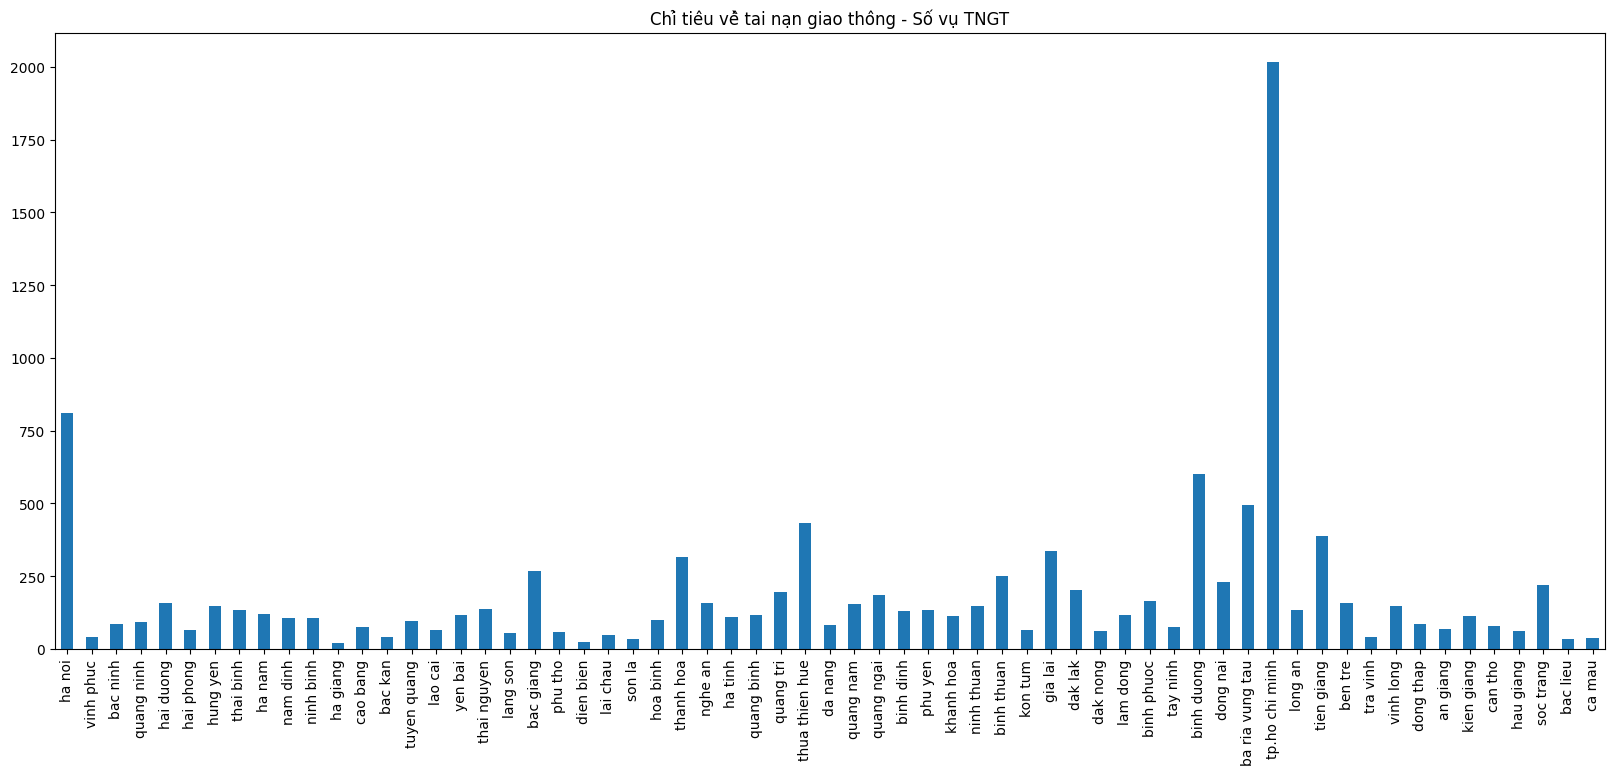

In [25]:
stacked_bar_plot(tngt_p, 'Số vụ TNGT', 2022, title='Chỉ tiêu về tai nạn giao thông - Số vụ TNGT')

In [26]:
describe_(tngt_p, 'Số vụ TNGT', 2022)

count      63.000000
mean      181.746032
std       273.967974
min        20.000000
25%        66.500000
50%       117.000000
75%       162.500000
max      2016.000000
Name: 2022, dtype: float64

In [27]:
province_with_max_value(tngt_p, 'Số vụ TNGT', [2022])

2022 tp.ho chi minh Đông Nam Bộ


In [28]:
top_k_province_worst_sub_feature(tngt_p, 'Số vụ TNGT', [2022], topk=10)

2022:
ha giang, Trung du và miền núi phía Bắc: 20
dien bien, Trung du và miền núi phía Bắc: 25
son la, Trung du và miền núi phía Bắc: 35
bac lieu, Đồng bằng sông Cửu Long: 35
ca mau, Đồng bằng sông Cửu Long: 36
vinh phuc, Đồng bằng sông Hồng: 40
tra vinh, Đồng bằng sông Cửu Long: 40
bac kan, Trung du và miền núi phía Bắc: 41
lai chau, Trung du và miền núi phía Bắc: 47
lang son, Trung du và miền núi phía Bắc: 55
------------------------------


In [29]:
?report_p

In [30]:
report_p(tngt_p, 'Số vụ TNGT', [2022], title='')

              2022
count    63.000000
mean    181.746032
std     273.967974
min      20.000000
25%      66.500000
50%     117.000000
75%     162.500000
max    2016.000000

TOP 10 THẤP NHẤT: 

2022:
ha giang, Trung du và miền núi phía Bắc: 20
dien bien, Trung du và miền núi phía Bắc: 25
son la, Trung du và miền núi phía Bắc: 35
bac lieu, Đồng bằng sông Cửu Long: 35
ca mau, Đồng bằng sông Cửu Long: 36
------------------------------

TOP 10 CAO NHẤT: 

2022:
tp.ho chi minh, Đông Nam Bộ: 2016
ha noi, Đồng bằng sông Hồng: 812
binh duong, Đông Nam Bộ: 602
ba ria vung tau, Đông Nam Bộ: 496
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 433
------------------------------


In [31]:
report_vm(tngt_vm, 'Số vụ TNGT', [2022], title='')

              2022
count     6.000000
mean   1908.333333
std    1017.418432
min     784.000000
25%    1243.000000
50%    1710.000000
75%    2356.250000
max    3587.000000

TOP 10 THẤP NHẤT: 

2022:
tay nguyen, None: 784
trung du va mien nui phia bac, None: 1138
dong bang song cuu long, None: 1558
dong bang song hong, None: 1862
bac trung bo va duyen hai mien trung, None: 2521
------------------------------

TOP 10 CAO NHẤT: 

2022:
dong nam bo, None: 3587
bac trung bo va duyen hai mien trung, None: 2521
dong bang song hong, None: 1862
dong bang song cuu long, None: 1558
trung du va mien nui phia bac, None: 1138
------------------------------


In [32]:
top_k_province_best_sub_feature(tngt_p, 'Số vụ TNGT', [2022], topk=10)

2022:
tp.ho chi minh, Đông Nam Bộ: 2016
ha noi, Đồng bằng sông Hồng: 812
binh duong, Đông Nam Bộ: 602
ba ria vung tau, Đông Nam Bộ: 496
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 433
tien giang, Đồng bằng sông Cửu Long: 387
gia lai, Tây Nguyên: 337
thanh hoa, Bắc Trung Bộ và duyên hải miền Trung: 316
bac giang, Trung du và miền núi phía Bắc: 267
binh thuan, Bắc Trung Bộ và duyên hải miền Trung: 250
------------------------------


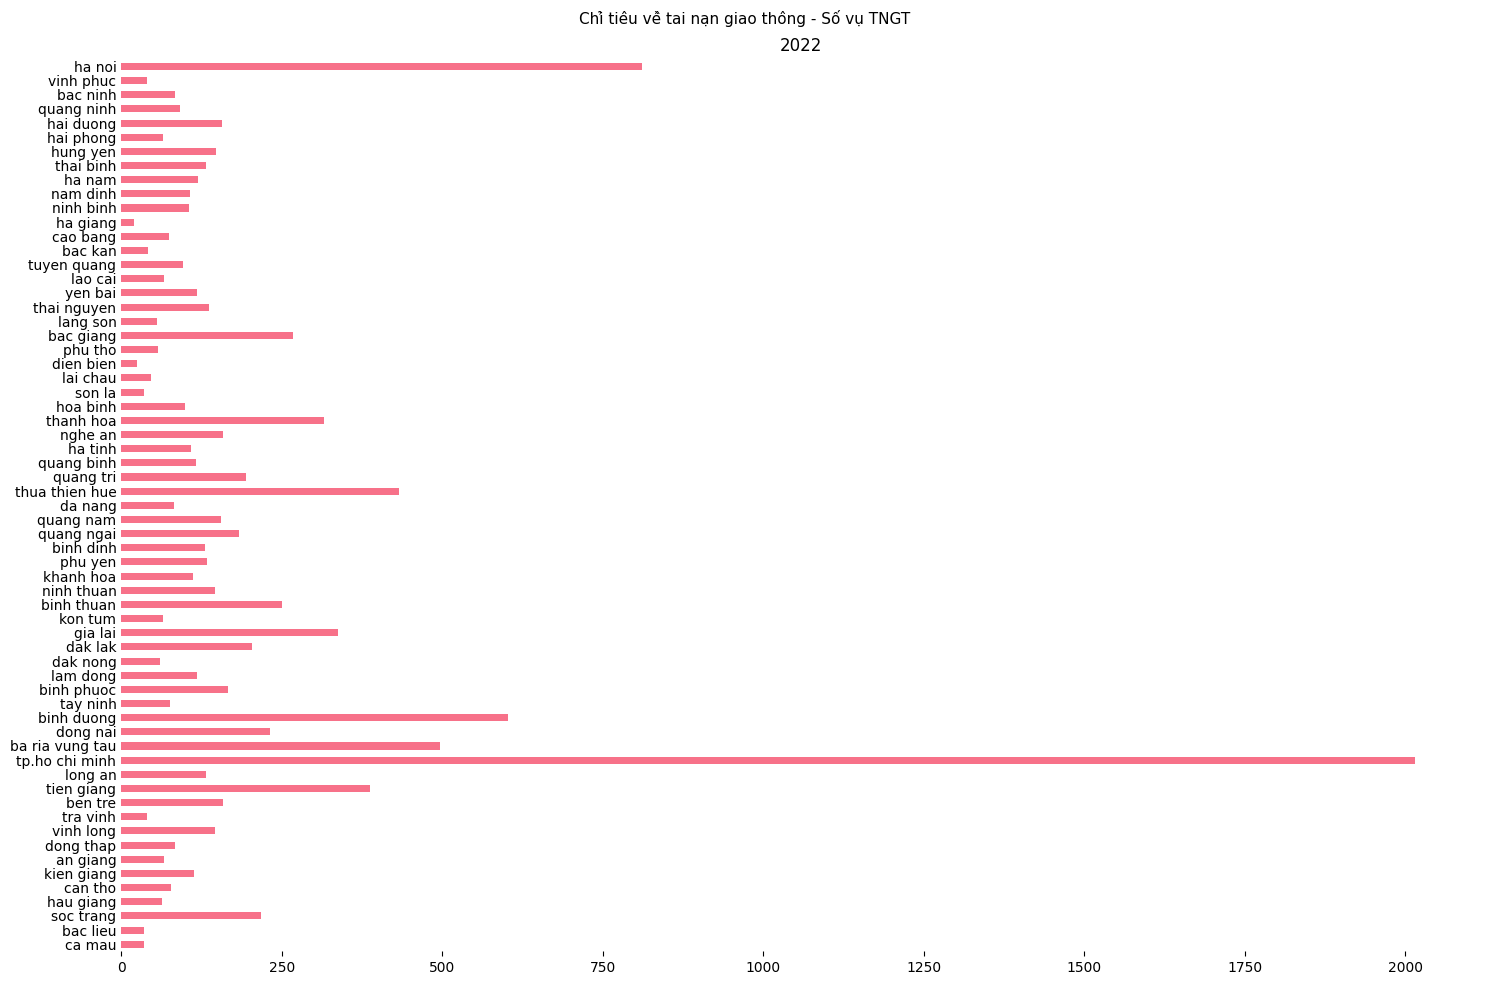

In [33]:
pannel_bar_plot(tngt_p, 'Số vụ TNGT', [2022], title='Chỉ tiêu về tai nạn giao thông - Số vụ TNGT')

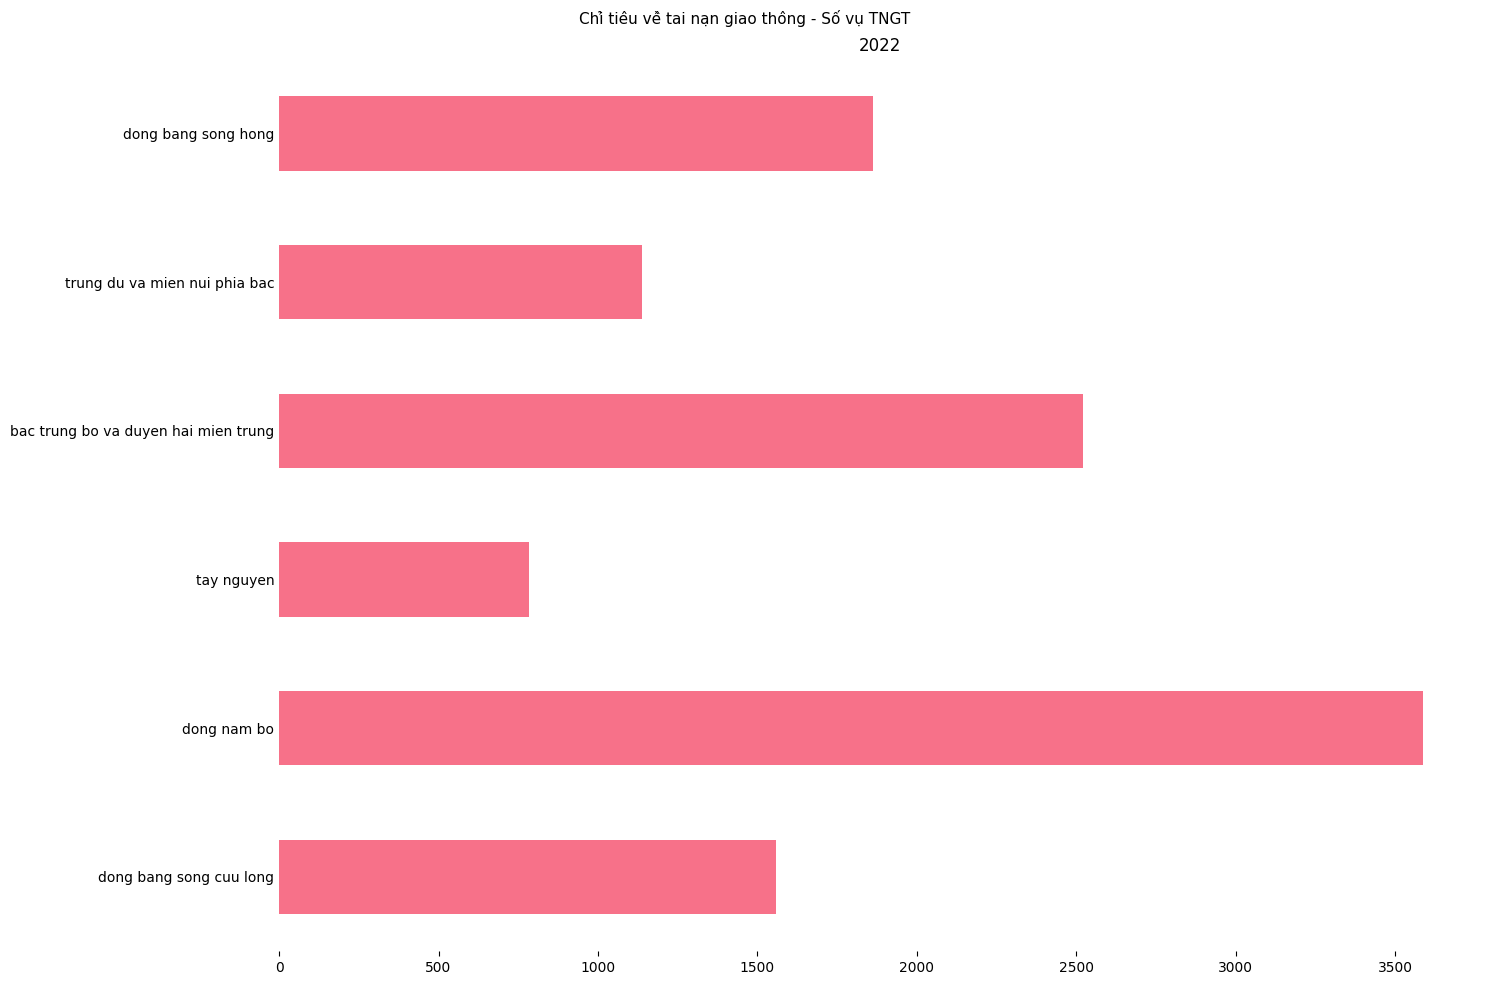

In [34]:
pannel_bar_plot(tngt_vm, 'Số vụ TNGT', [2022], title='Chỉ tiêu về tai nạn giao thông - Số vụ TNGT')

#### Số người chết


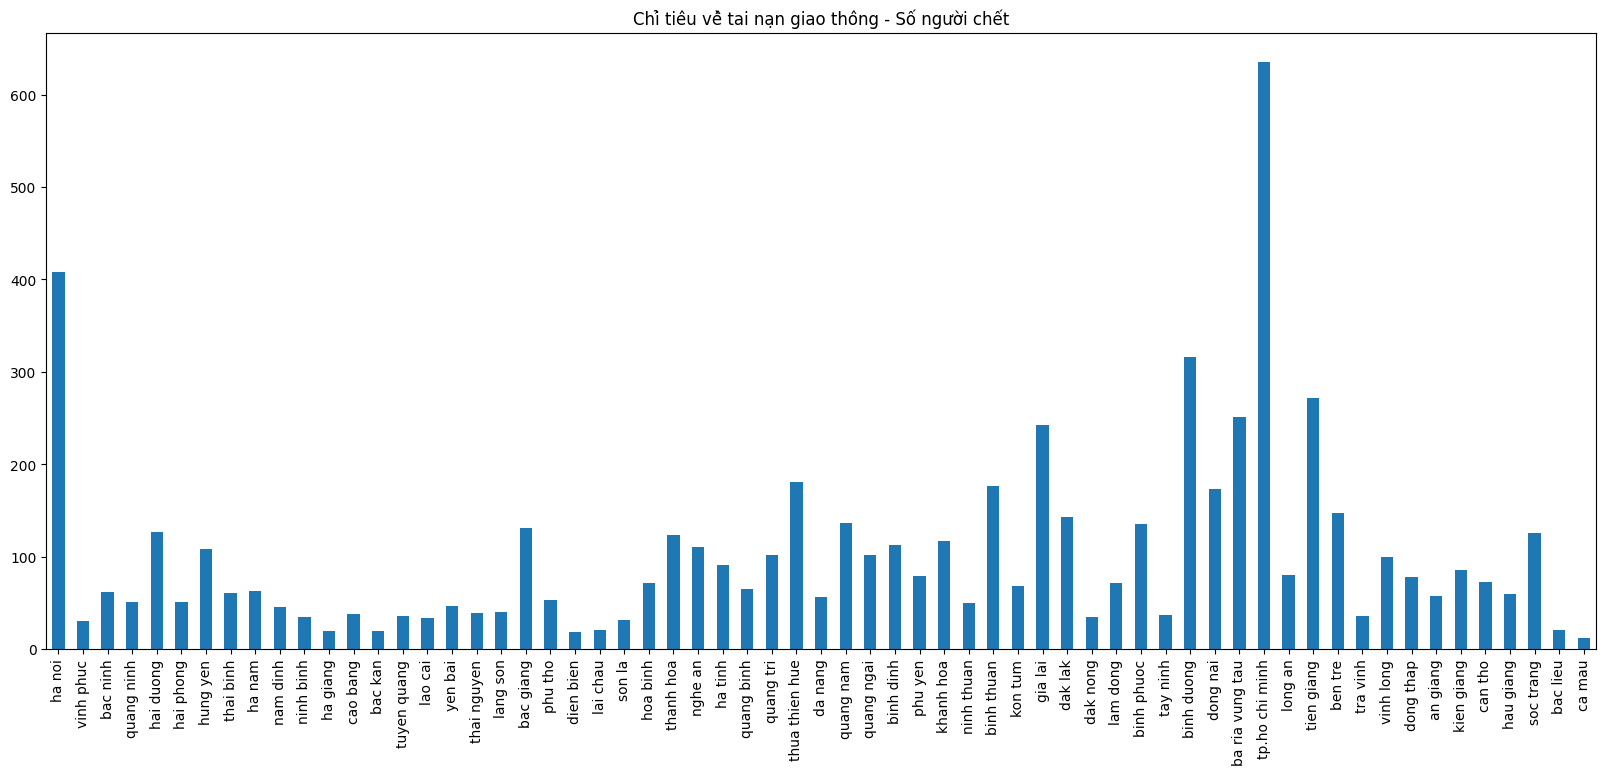

In [35]:
stacked_bar_plot(tngt_p, 'Số người chết', 2022, title='Chỉ tiêu về tai nạn giao thông - Số người chết')

In [36]:
describe_(tngt_p, 'Số người chết', 2022)

count     63.000000
mean     101.333333
std      102.052169
min       12.000000
25%       39.500000
50%       71.000000
75%      124.000000
max      635.000000
Name: 2022, dtype: float64

In [37]:
province_with_max_value(tngt_p, 'Số người chết', [2022])

2022 tp.ho chi minh Đông Nam Bộ


In [38]:
top_k_province_worst_sub_feature(tngt_p, 'Số người chết', [2022], topk=10)

2022:
ca mau, Đồng bằng sông Cửu Long: 12
dien bien, Trung du và miền núi phía Bắc: 18
bac kan, Trung du và miền núi phía Bắc: 19
ha giang, Trung du và miền núi phía Bắc: 19
lai chau, Trung du và miền núi phía Bắc: 21
bac lieu, Đồng bằng sông Cửu Long: 21
vinh phuc, Đồng bằng sông Hồng: 30
son la, Trung du và miền núi phía Bắc: 31
lao cai, Trung du và miền núi phía Bắc: 33
dak nong, Tây Nguyên: 34
------------------------------


In [39]:
top_k_province_best_sub_feature(tngt_p, 'Số người chết', [2022], topk=10)

2022:
tp.ho chi minh, Đông Nam Bộ: 635
ha noi, Đồng bằng sông Hồng: 408
binh duong, Đông Nam Bộ: 316
tien giang, Đồng bằng sông Cửu Long: 272
ba ria vung tau, Đông Nam Bộ: 251
gia lai, Tây Nguyên: 242
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 181
binh thuan, Bắc Trung Bộ và duyên hải miền Trung: 176
dong nai, Đông Nam Bộ: 173
ben tre, Đồng bằng sông Cửu Long: 147
------------------------------


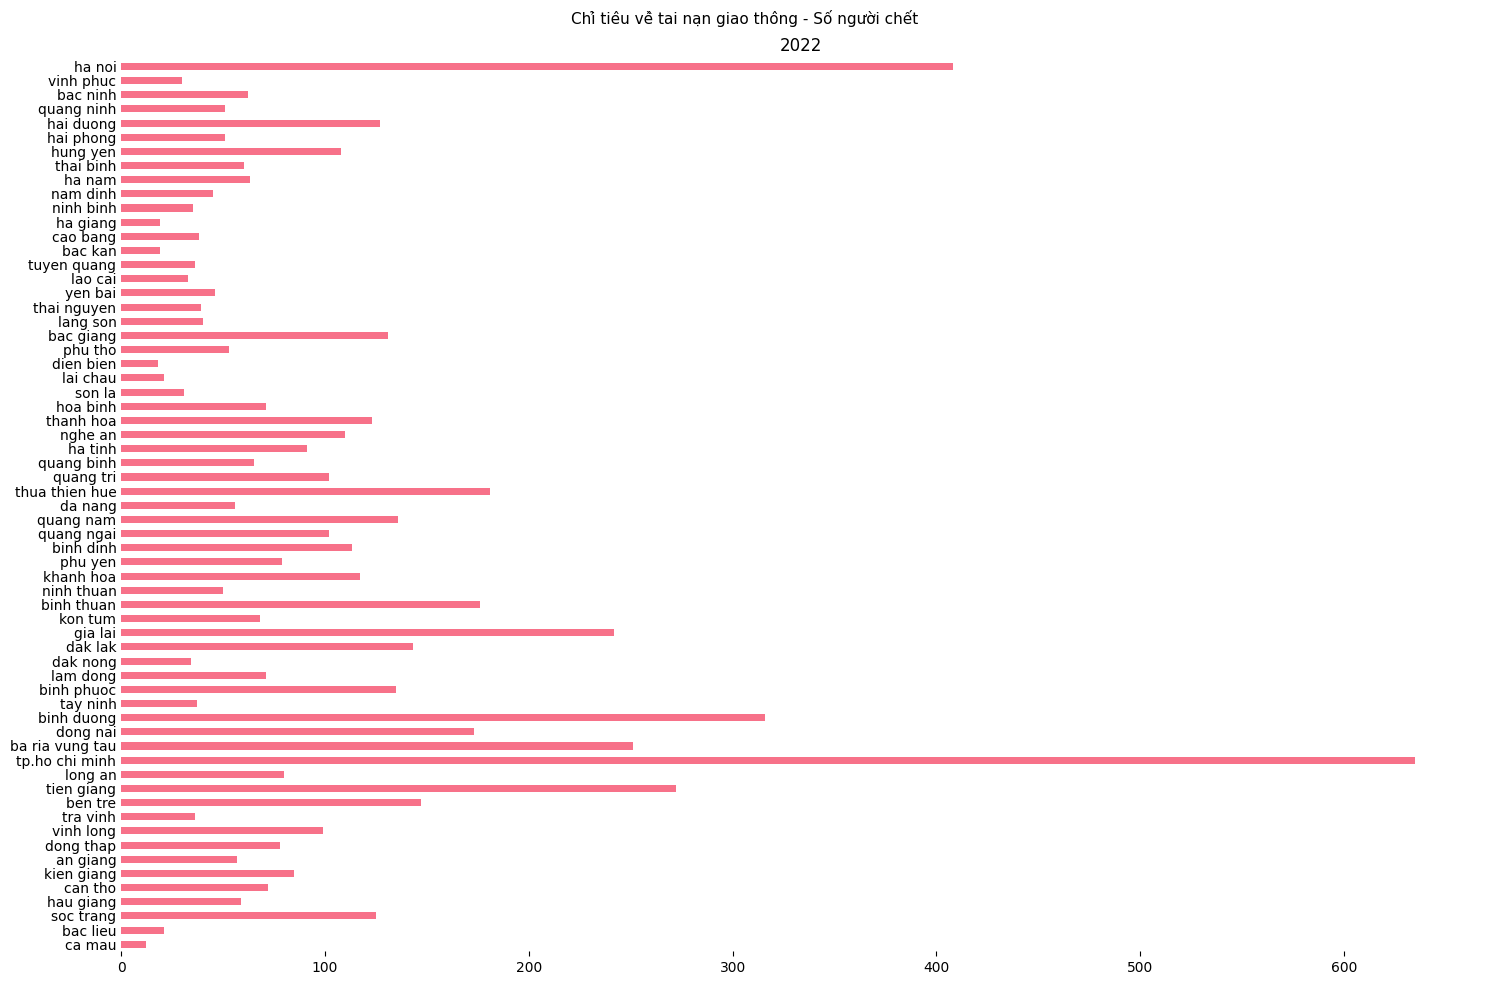

In [40]:
pannel_bar_plot(tngt_p, 'Số người chết', [2022], title='Chỉ tiêu về tai nạn giao thông - Số người chết')

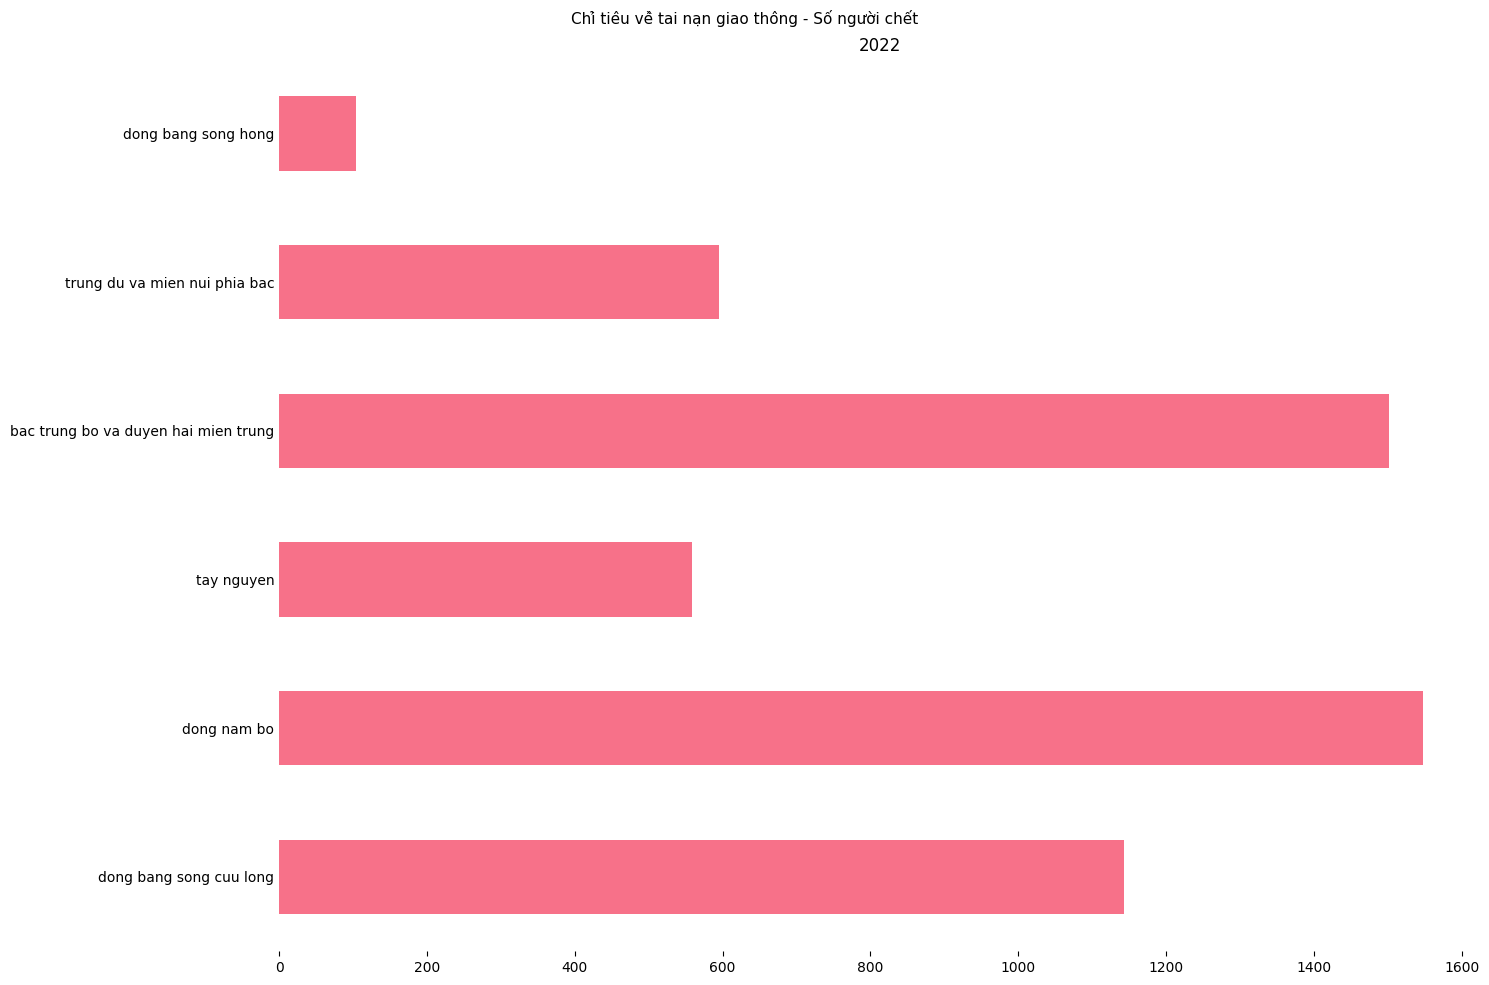

In [41]:
pannel_bar_plot(tngt_vm, 'Số người chết', [2022], title='Chỉ tiêu về tai nạn giao thông - Số người chết')

#### Số người bị thương

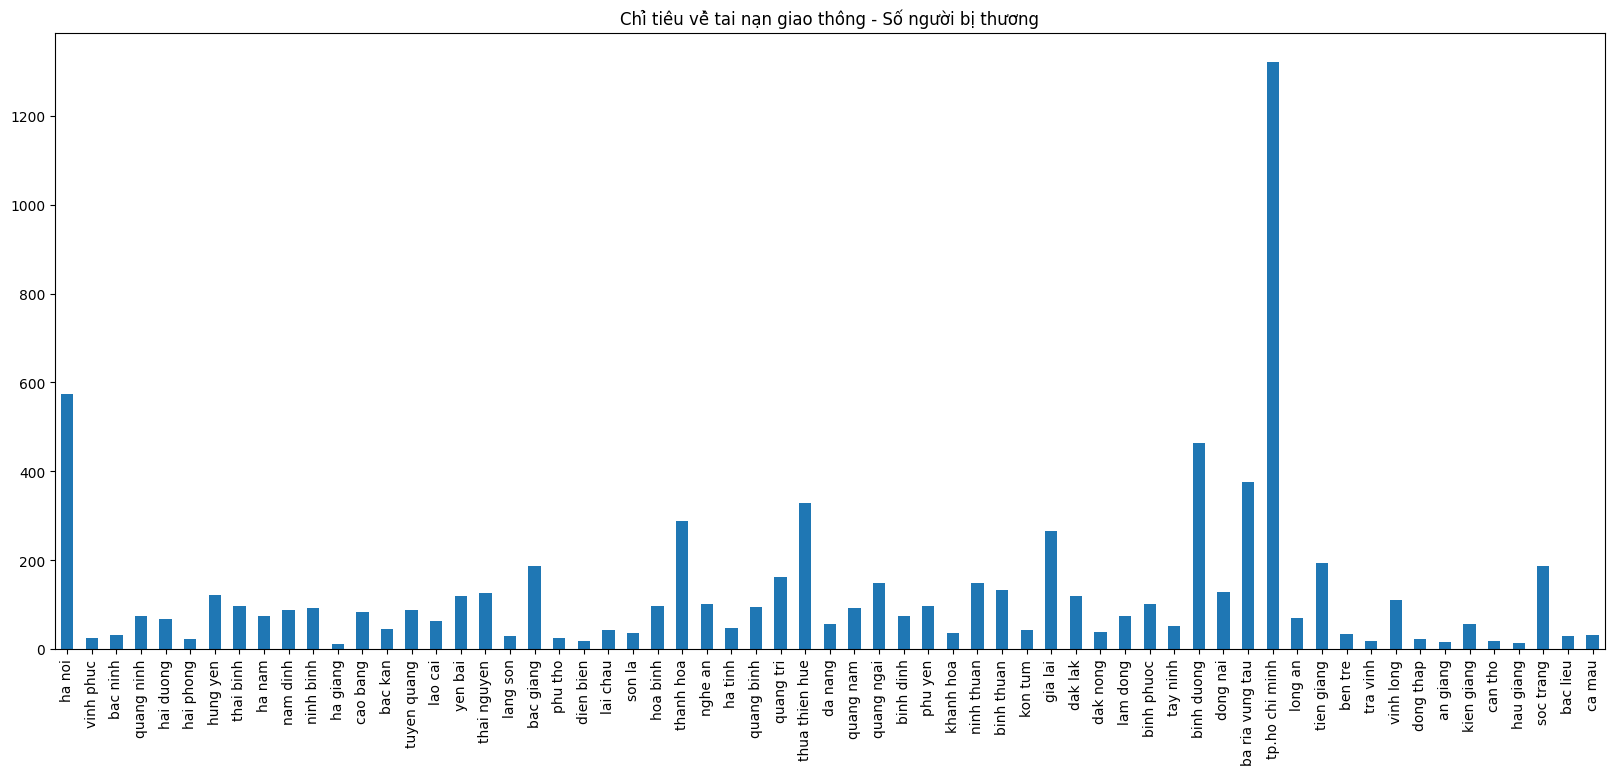

In [42]:
stacked_bar_plot(tngt_p, 'Số người bị thương', 2022, title='Chỉ tiêu về tai nạn giao thông - Số người bị thương')

In [43]:
describe_(tngt_p, 'Số người bị thương', 2022)

count      63.000000
mean      123.873016
std       186.912822
min        10.000000
25%        36.000000
50%        74.000000
75%       123.000000
max      1321.000000
Name: 2022, dtype: float64

In [44]:
province_with_max_value(tngt_p, 'Số người bị thương', [2022])

2022 tp.ho chi minh Đông Nam Bộ


In [45]:
top_k_province_best_sub_feature(tngt_p, 'Số người bị thương', [2022], topk=10)

2022:
tp.ho chi minh, Đông Nam Bộ: 1321
ha noi, Đồng bằng sông Hồng: 573
binh duong, Đông Nam Bộ: 463
ba ria vung tau, Đông Nam Bộ: 376
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 329
thanh hoa, Bắc Trung Bộ và duyên hải miền Trung: 288
gia lai, Tây Nguyên: 265
tien giang, Đồng bằng sông Cửu Long: 194
bac giang, Trung du và miền núi phía Bắc: 186
soc trang, Đồng bằng sông Cửu Long: 186
------------------------------


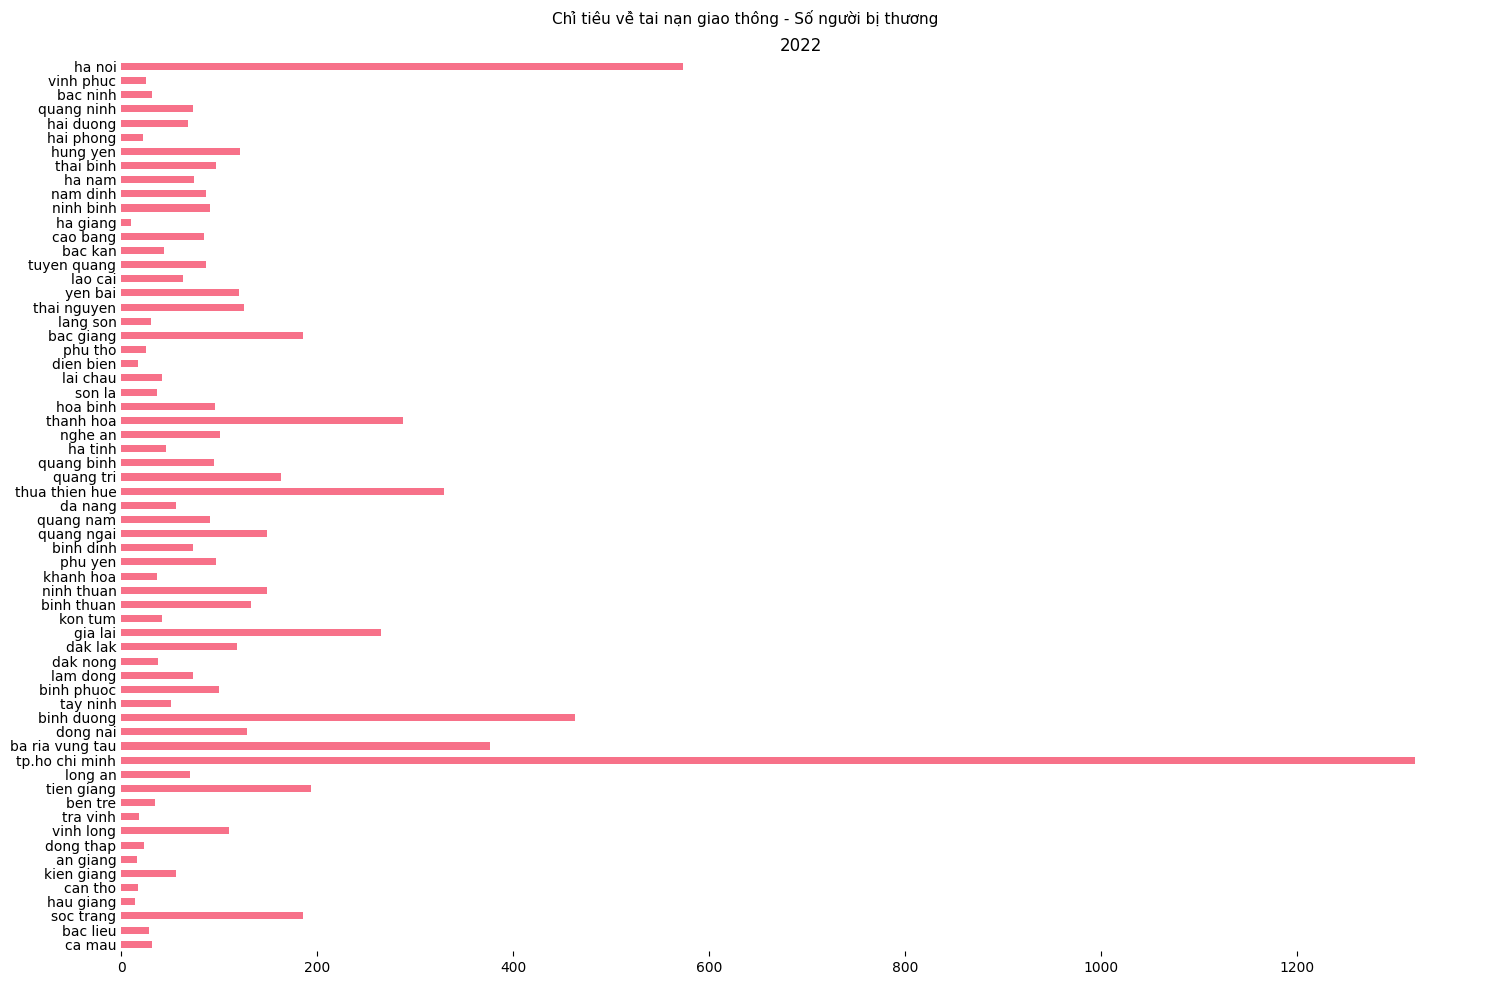

In [46]:
pannel_bar_plot(tngt_p, 'Số người bị thương', [2022], title='Chỉ tiêu về tai nạn giao thông - Số người bị thương')

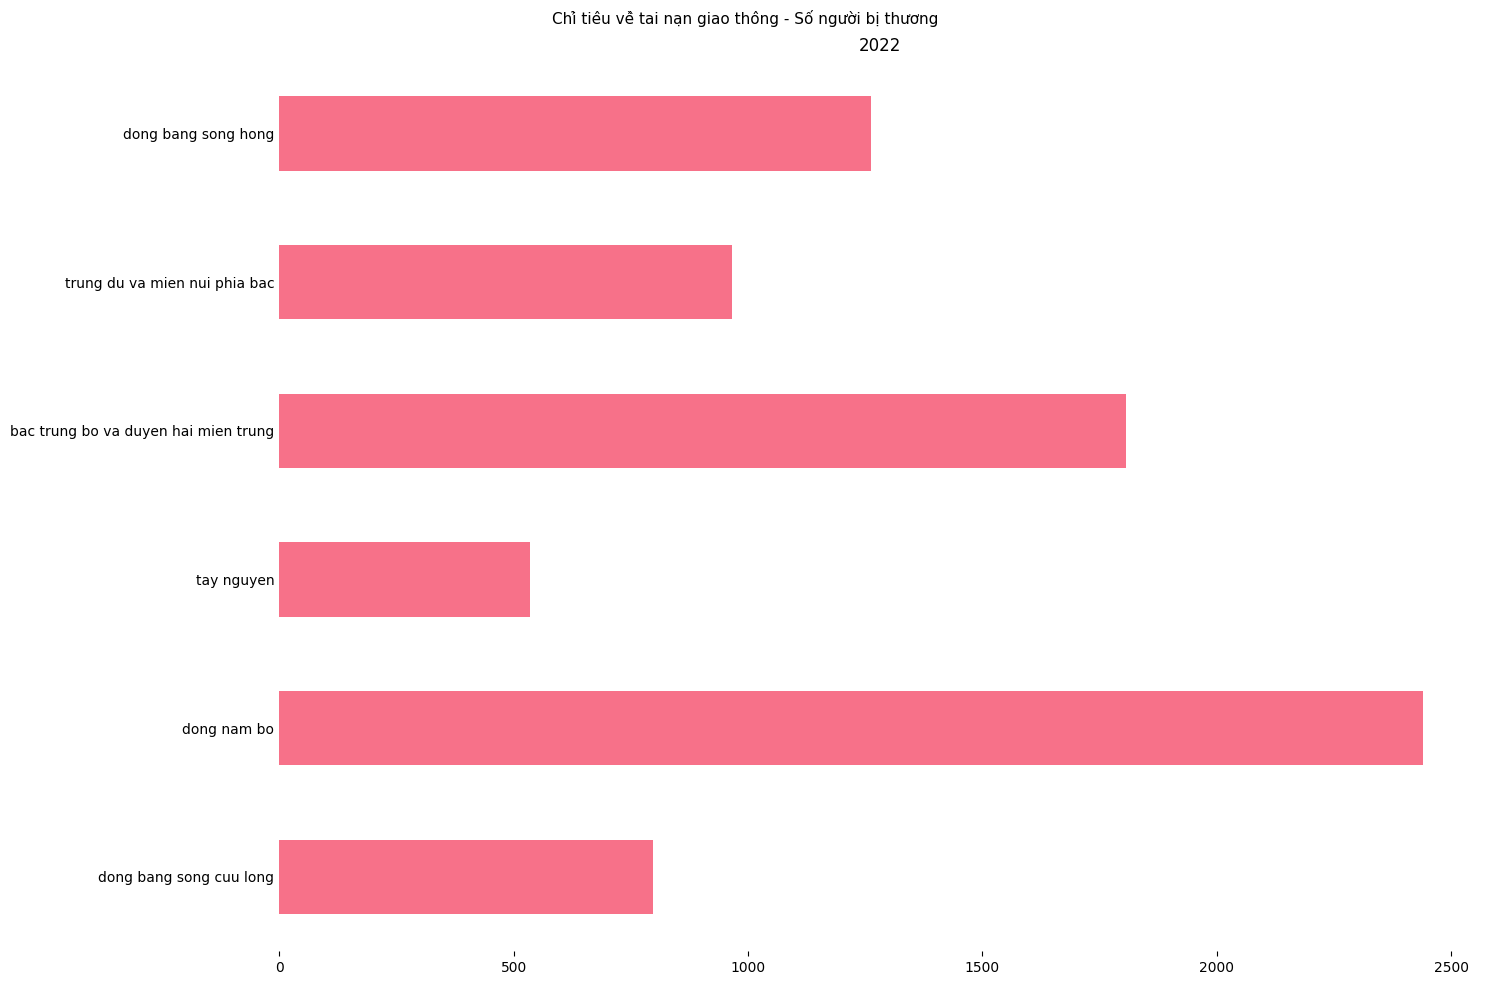

In [47]:
pannel_bar_plot(tngt_vm, 'Số người bị thương', [2022], title='Chỉ tiêu về tai nạn giao thông - Số người bị thương')

### Một số chỉ tiêu về vụ cháy, nổ phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu  -  ['Số vụ cháy, nổ (Vụ)' 'Số người chết (người)'




In [48]:
chay = preprocess_df(clcc.copy(), features[1], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-10-9a4f276e21d3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-10-9a4f276e21d3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-10-9a4f276e21d3>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh'

In [49]:
chay

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
214,"Một số chỉ tiêu về vụ cháy, nổ pha...",dong bang song hong,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591,NaN
215,"Một số chỉ tiêu về vụ cháy, nổ pha...",ha noi,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387,NaN
216,"Một số chỉ tiêu về vụ cháy, nổ pha...",vinh phuc,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN
217,"Một số chỉ tiêu về vụ cháy, nổ pha...",bac ninh,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
218,"Một số chỉ tiêu về vụ cháy, nổ pha...",quang ninh,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,"Một số chỉ tiêu về vụ cháy, nổ pha...",can tho,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1273,NaN
492,"Một số chỉ tiêu về vụ cháy, nổ pha...",hau giang,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400,NaN
493,"Một số chỉ tiêu về vụ cháy, nổ pha...",soc trang,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5802,NaN
494,"Một số chỉ tiêu về vụ cháy, nổ pha...",bac lieu,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN


In [50]:
chay_p = chay[chay.Province.isin(province_name_preprocessed)]
chay_vm = chay[chay.Province.isin(vung_mien_name_preprocessed)]

#### Số vụ cháy, nổ (Vụ)

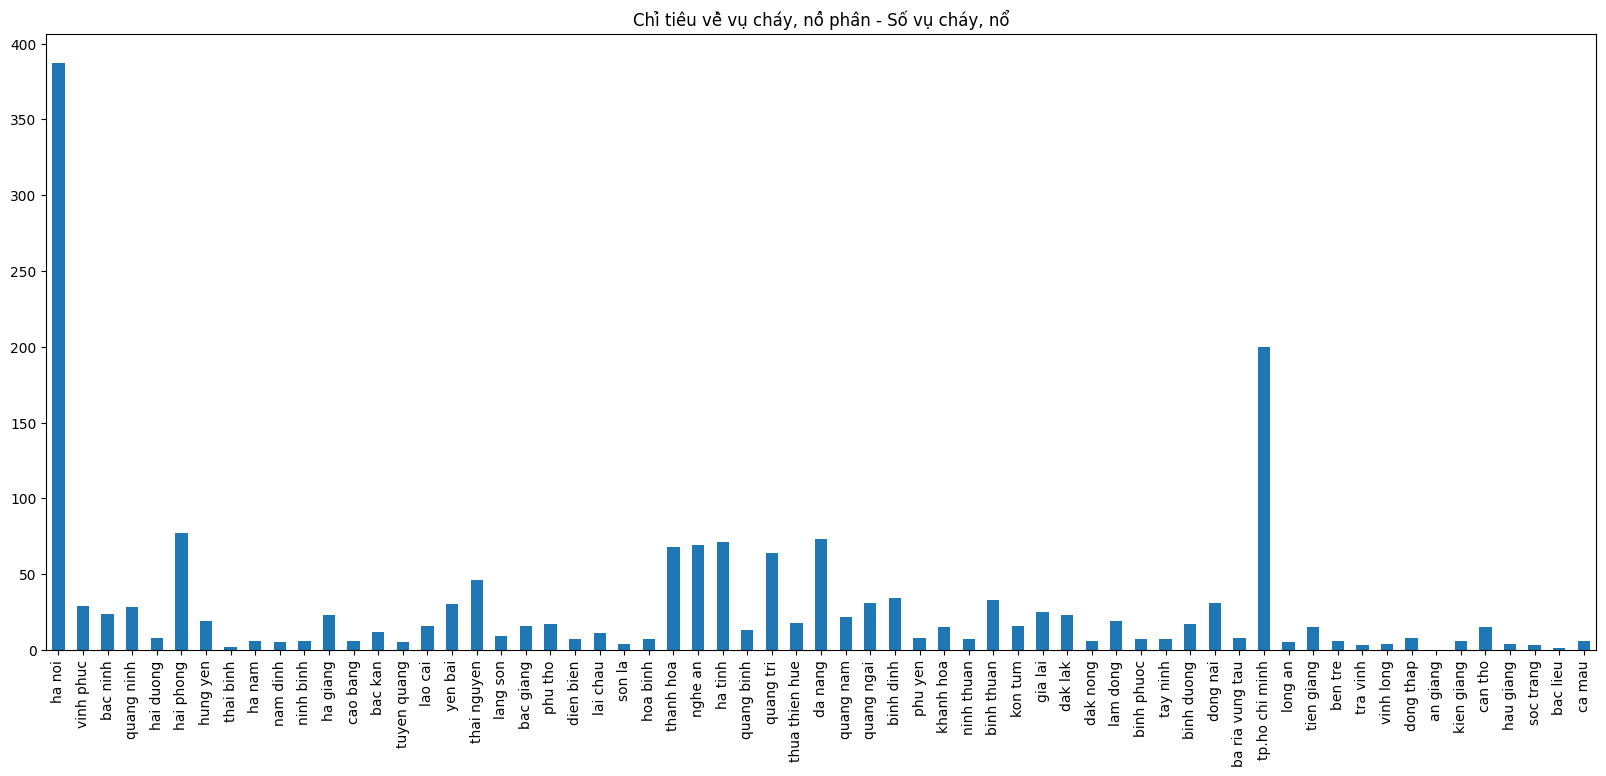

In [51]:
stacked_bar_plot(chay_p, 'Số vụ cháy, nổ (Vụ)', 2022, title='Chỉ tiêu về vụ cháy, nổ phân - Số vụ cháy, nổ')

In [52]:
describe_(chay_p, 'Số vụ cháy, nổ (Vụ)', 2022)

count     63.000000
mean      27.952381
std       54.824773
min        0.000000
25%        6.000000
50%       15.000000
75%       26.500000
max      387.000000
Name: 2022, dtype: float64

In [53]:
province_with_max_value(chay_p, 'Số vụ cháy, nổ (Vụ)', [2022])

2022 ha noi Đồng bằng sông Hồng


In [54]:
def top_k_province_worst_sub_feature1(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=True).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=True).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)

top_k_province_worst_sub_feature1(chay_p, 'Số vụ cháy, nổ (Vụ)', [2022], topk=10)

2022:
an giang, Đồng bằng sông Cửu Long: 0
bac lieu, Đồng bằng sông Cửu Long: 1
thai binh, Đồng bằng sông Hồng: 2
soc trang, Đồng bằng sông Cửu Long: 3
tra vinh, Đồng bằng sông Cửu Long: 3
vinh long, Đồng bằng sông Cửu Long: 4
son la, Trung du và miền núi phía Bắc: 4
hau giang, Đồng bằng sông Cửu Long: 4
long an, Đồng bằng sông Cửu Long: 5
nam dinh, Đồng bằng sông Hồng: 5
------------------------------


In [55]:
top_k_province_best_sub_feature(chay_p, 'Số vụ cháy, nổ (Vụ)', [2022], topk=10)

2022:
ha noi, Đồng bằng sông Hồng: 387
tp.ho chi minh, Đông Nam Bộ: 200
hai phong, Đồng bằng sông Hồng: 77
da nang, Bắc Trung Bộ và duyên hải miền Trung: 73
ha tinh, Bắc Trung Bộ và duyên hải miền Trung: 71
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 69
thanh hoa, Bắc Trung Bộ và duyên hải miền Trung: 68
quang tri, Bắc Trung Bộ và duyên hải miền Trung: 64
thai nguyen, Trung du và miền núi phía Bắc: 46
binh dinh, Bắc Trung Bộ và duyên hải miền Trung: 34
------------------------------


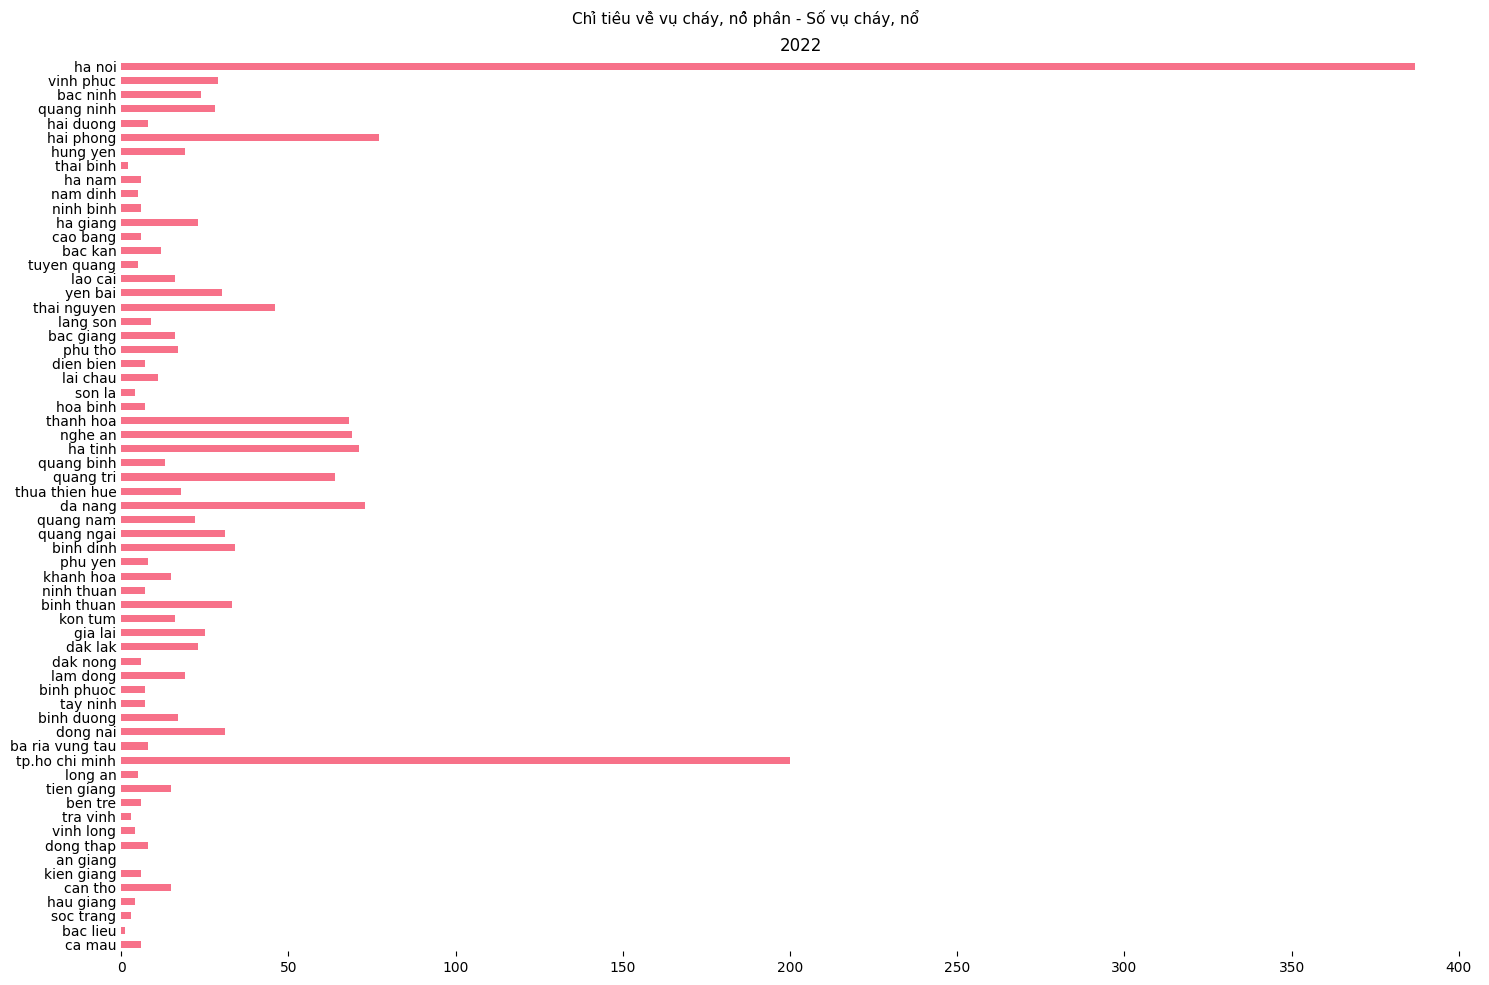

In [56]:
pannel_bar_plot(chay_p, 'Số vụ cháy, nổ (Vụ)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số vụ cháy, nổ')
#pannel_bar_plot(chay_vm, 'Số vụ cháy, nổ (Vụ)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số vụ cháy, nổ')

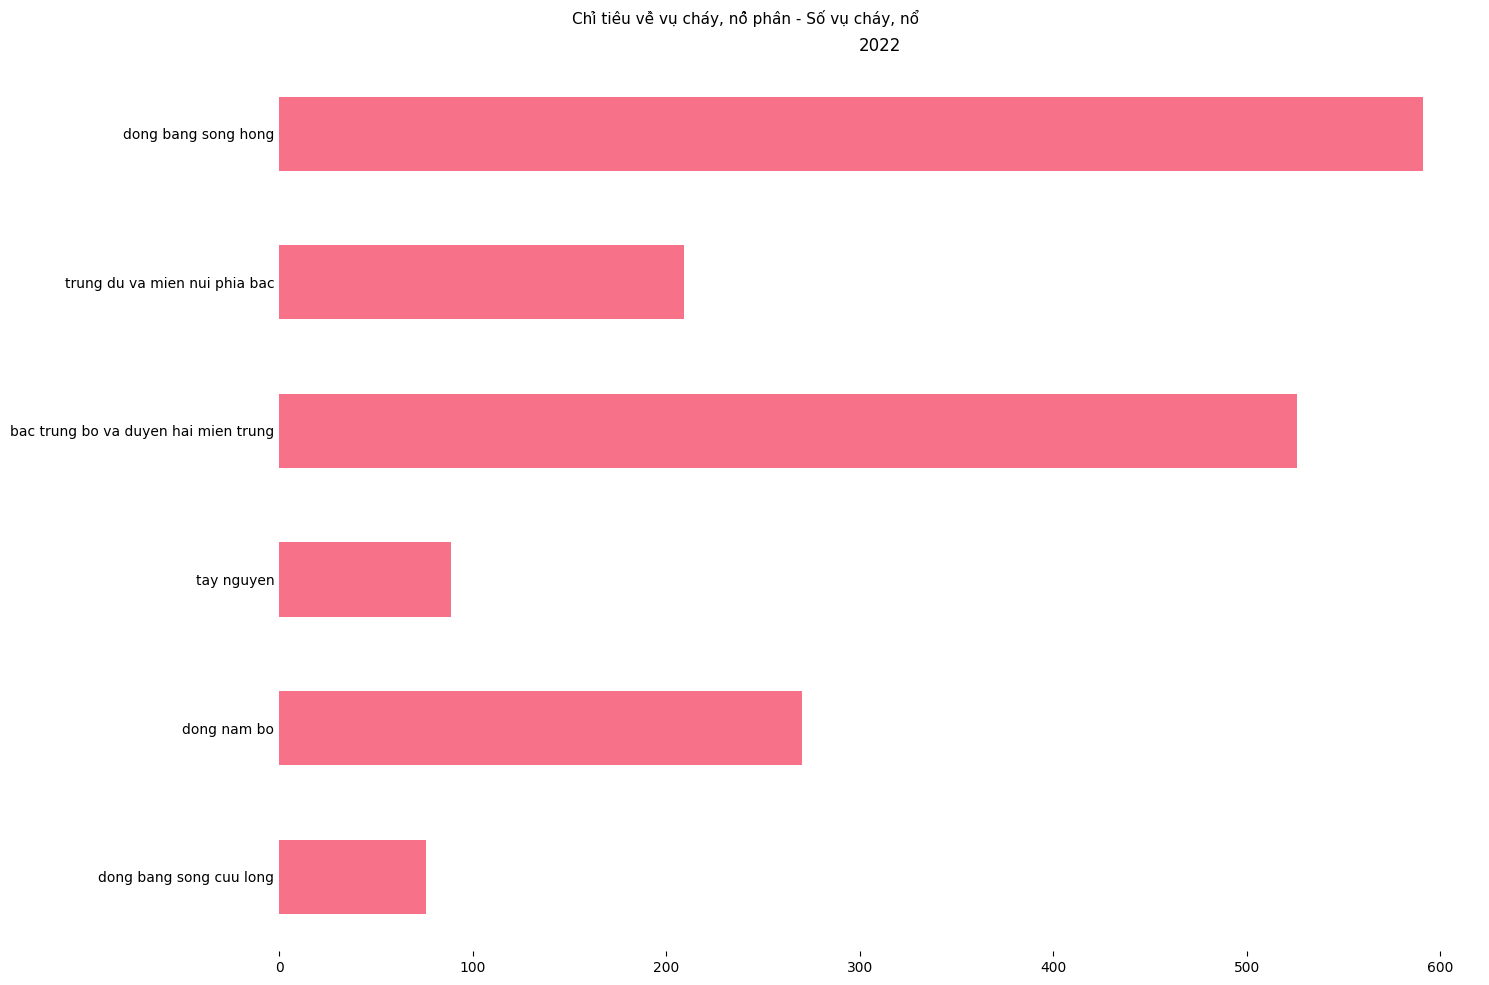

In [57]:
pannel_bar_plot(chay_vm, 'Số vụ cháy, nổ (Vụ)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số vụ cháy, nổ')


#### Số người chết (người)

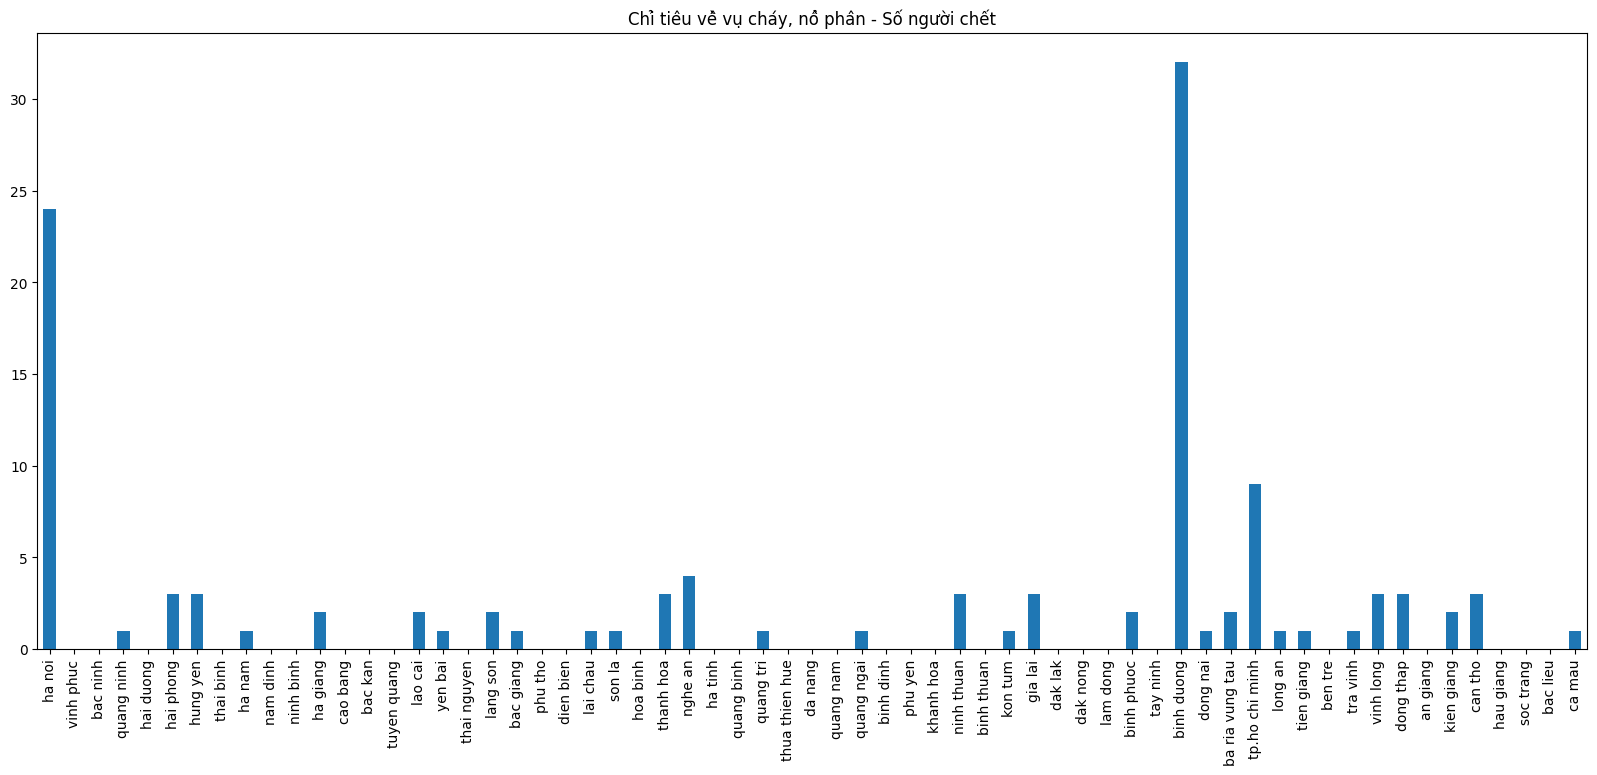

In [58]:
stacked_bar_plot(chay_p, 'Số người chết (người)', 2022, title='Chỉ tiêu về vụ cháy, nổ phân - Số người chết')

In [59]:
describe_(chay_p, 'Số người chết (người)', 2022)

count    63.000000
mean      1.888889
std       5.051704
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max      32.000000
Name: 2022, dtype: float64

In [60]:
province_with_max_value(chay_p, 'Số người chết (người)', [2022])

2022 binh duong Đông Nam Bộ


In [61]:
top_k_province_worst_sub_feature(chay_p, 'Số người chết (người)', [2022], topk=10)

2022:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 0
khanh hoa, Bắc Trung Bộ và duyên hải miền Trung: 0
quang nam, Bắc Trung Bộ và duyên hải miền Trung: 0
bac lieu, Đồng bằng sông Cửu Long: 0
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 0
binh thuan, Bắc Trung Bộ và duyên hải miền Trung: 0
quang binh, Bắc Trung Bộ và duyên hải miền Trung: 0
ha tinh, Bắc Trung Bộ và duyên hải miền Trung: 0
dak lak, Tây Nguyên: 0
hoa binh, Trung du và miền núi phía Bắc: 0
------------------------------


In [62]:
top_k_province_best_sub_feature(chay_p, 'Số người chết (người)', [2022], topk=10)

2022:
binh duong, Đông Nam Bộ: 32
ha noi, Đồng bằng sông Hồng: 24
tp.ho chi minh, Đông Nam Bộ: 9
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 4
hai phong, Đồng bằng sông Hồng: 3
hung yen, Đồng bằng sông Hồng: 3
vinh long, Đồng bằng sông Cửu Long: 3
ninh thuan, Bắc Trung Bộ và duyên hải miền Trung: 3
gia lai, Tây Nguyên: 3
thanh hoa, Bắc Trung Bộ và duyên hải miền Trung: 3
------------------------------


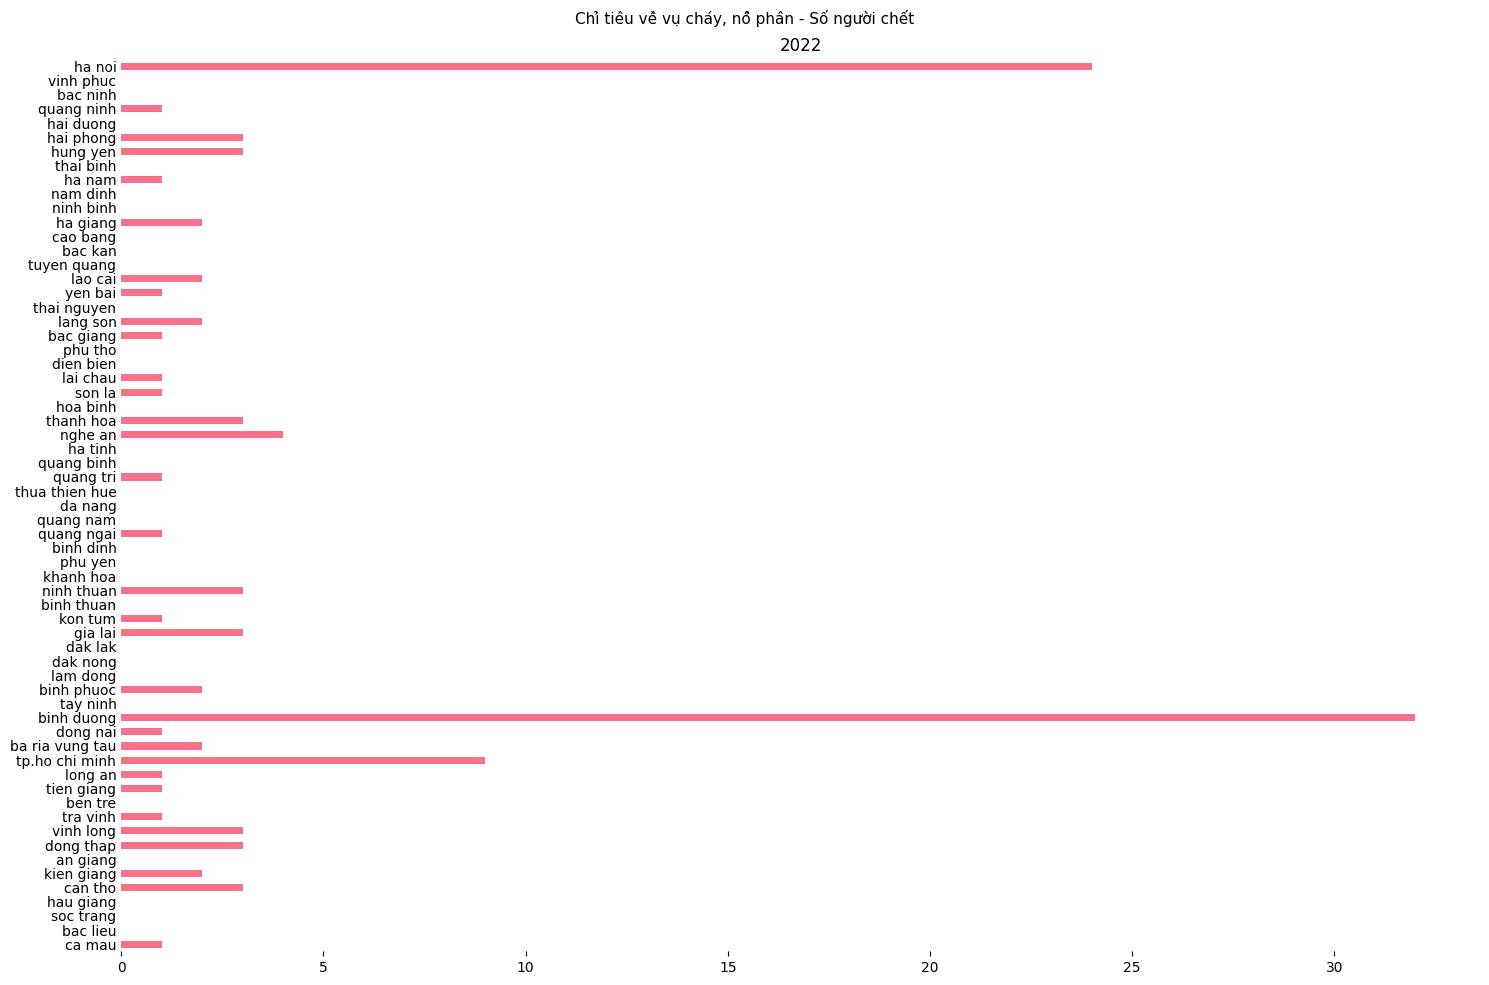

In [63]:
pannel_bar_plot(chay_p, 'Số người chết (người)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số người chết')
#pannel_bar_plot(chay_vm, 'Số vụ cháy, nổ (Vụ)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số vụ cháy, nổ')

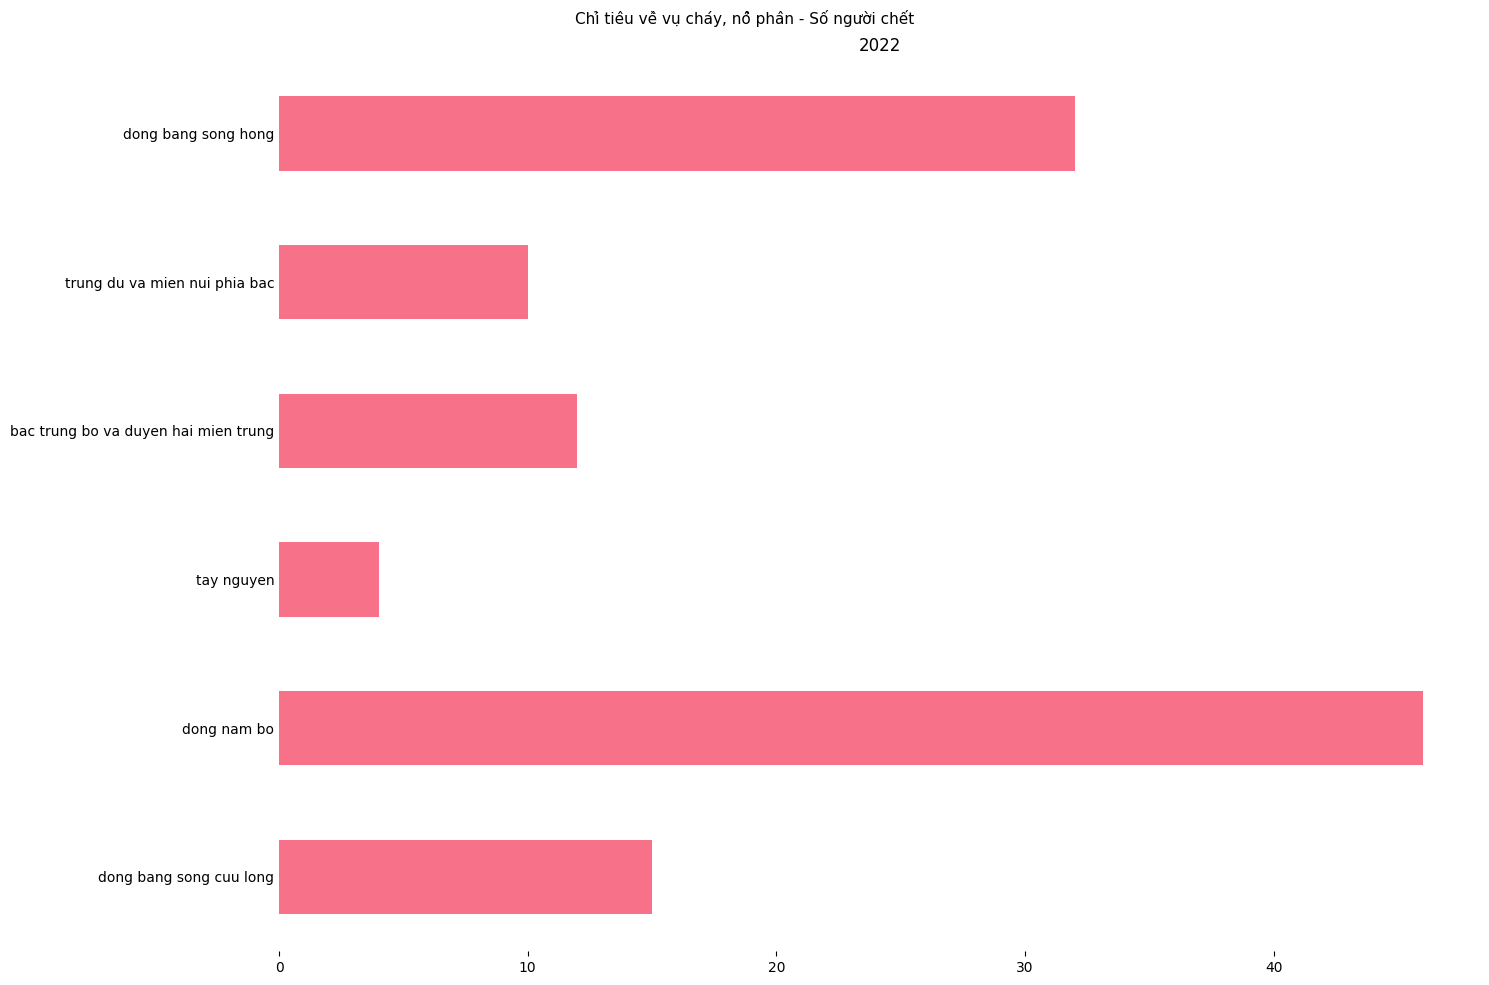

In [64]:
pannel_bar_plot(chay_vm, 'Số người chết (người)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số người chết')


#### Số người bị thương (Người)

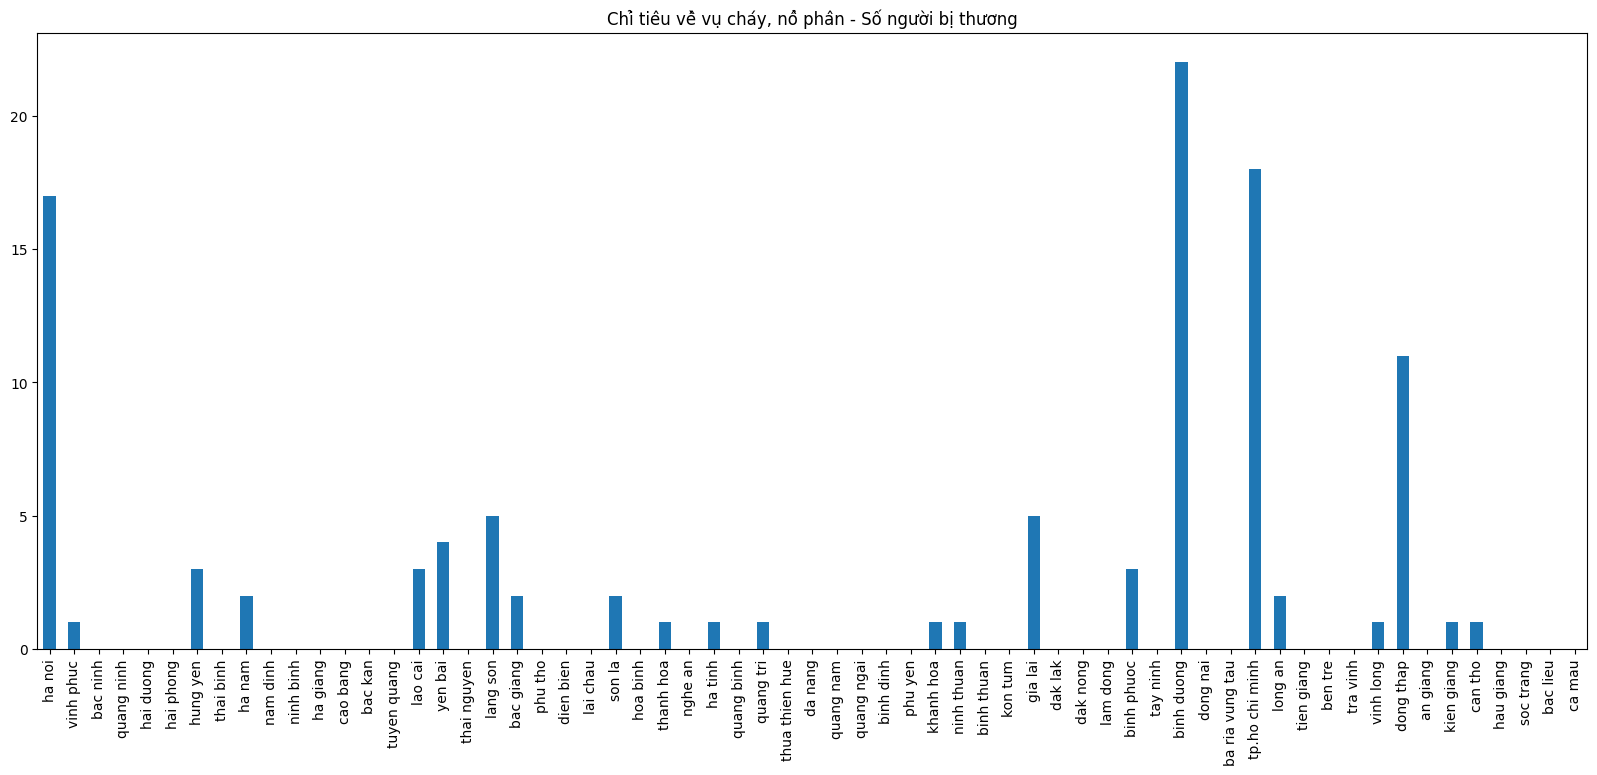

In [65]:
stacked_bar_plot(chay_p, 'Số người bị thương (Người)', 2022, title='Chỉ tiêu về vụ cháy, nổ phân - Số người bị thương')

In [66]:
describe_(chay_p, 'Số người bị thương (Người)', 2022)

count    63.000000
mean      1.714286
std       4.308389
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      22.000000
Name: 2022, dtype: float64

In [67]:
province_with_max_value(chay_p, 'Số người bị thương (Người)', [2022])

2022 binh duong Đông Nam Bộ


In [68]:
top_k_province_best_sub_feature(chay_p, 'Số người bị thương (Người)', [2022], topk=10)

2022:
binh duong, Đông Nam Bộ: 22
tp.ho chi minh, Đông Nam Bộ: 18
ha noi, Đồng bằng sông Hồng: 17
dong thap, Đồng bằng sông Cửu Long: 11
gia lai, Tây Nguyên: 5
lang son, Trung du và miền núi phía Bắc: 5
yen bai, Trung du và miền núi phía Bắc: 4
lao cai, Trung du và miền núi phía Bắc: 3
binh phuoc, Đông Nam Bộ: 3
hung yen, Đồng bằng sông Hồng: 3
------------------------------


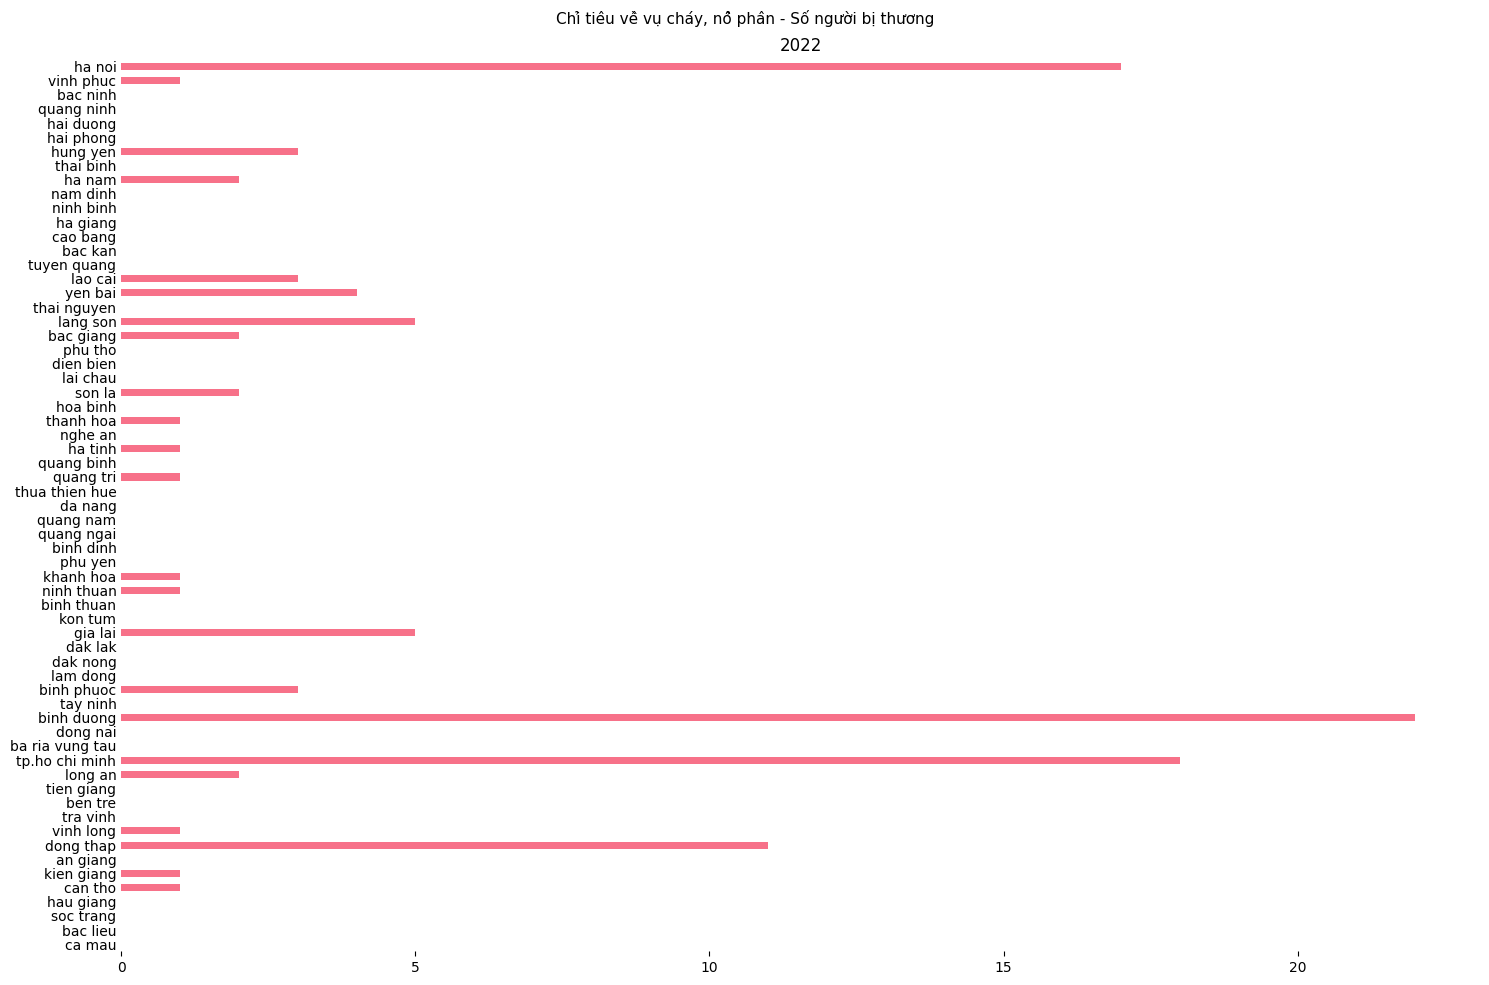

In [69]:
pannel_bar_plot(chay_p, 'Số người bị thương (Người)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số người bị thương')
#pannel_bar_plot(chay_vm, 'Số vụ cháy, nổ (Vụ)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số vụ cháy, nổ')

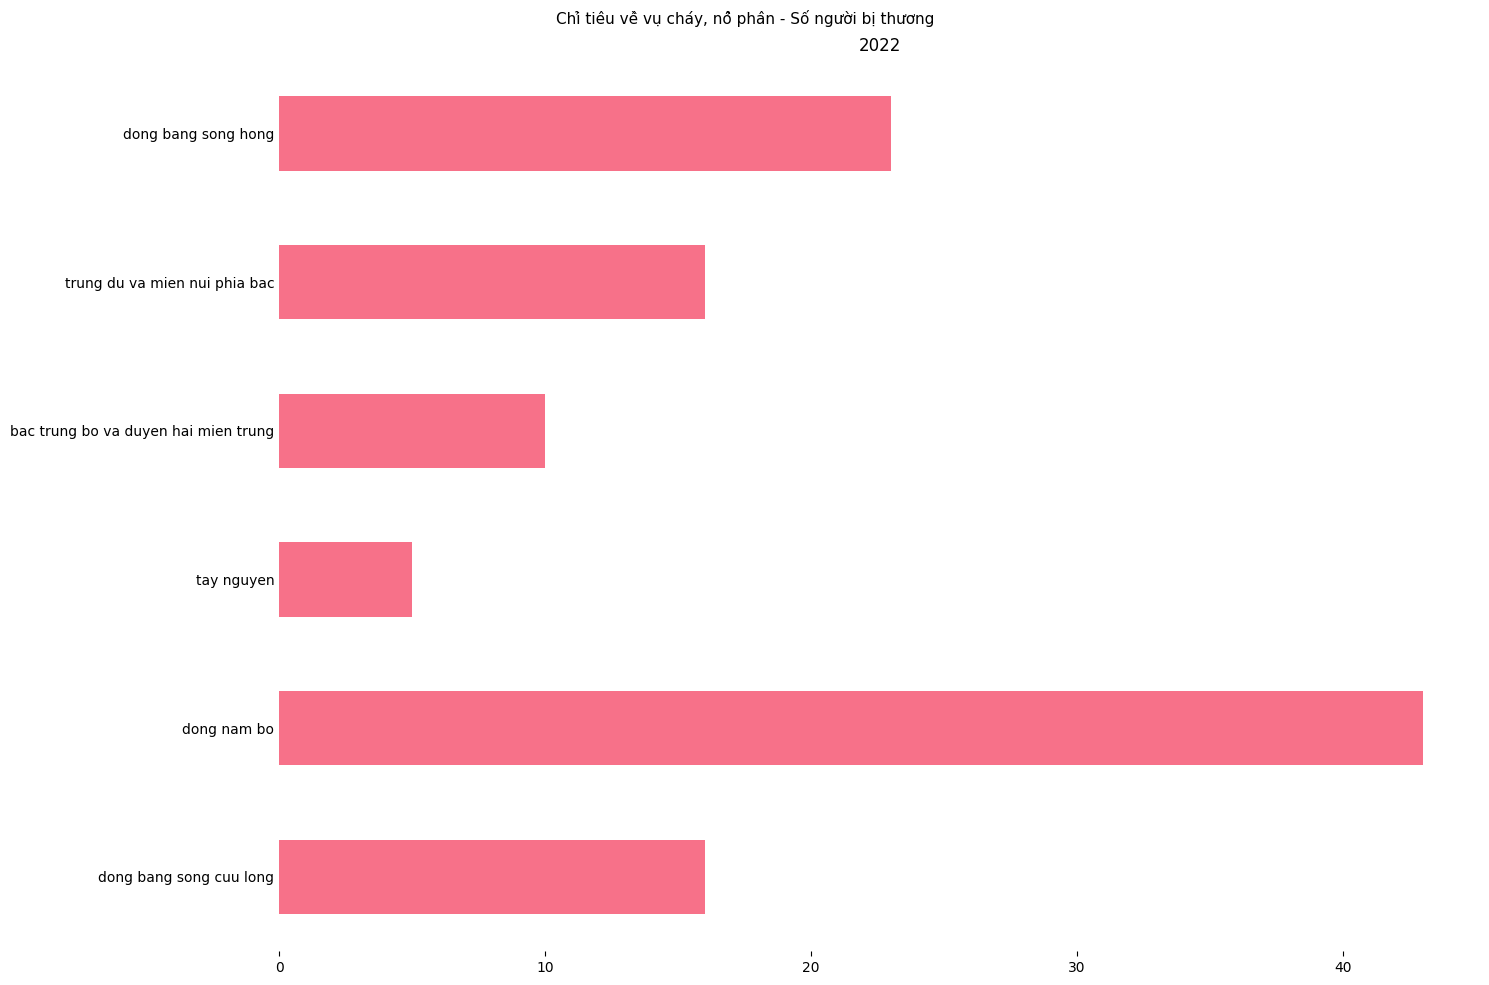

In [70]:
pannel_bar_plot(chay_vm, 'Số người bị thương (Người)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số người bị thương')


#### Thiệt hại do cháy nổ (Tỷ đồng)

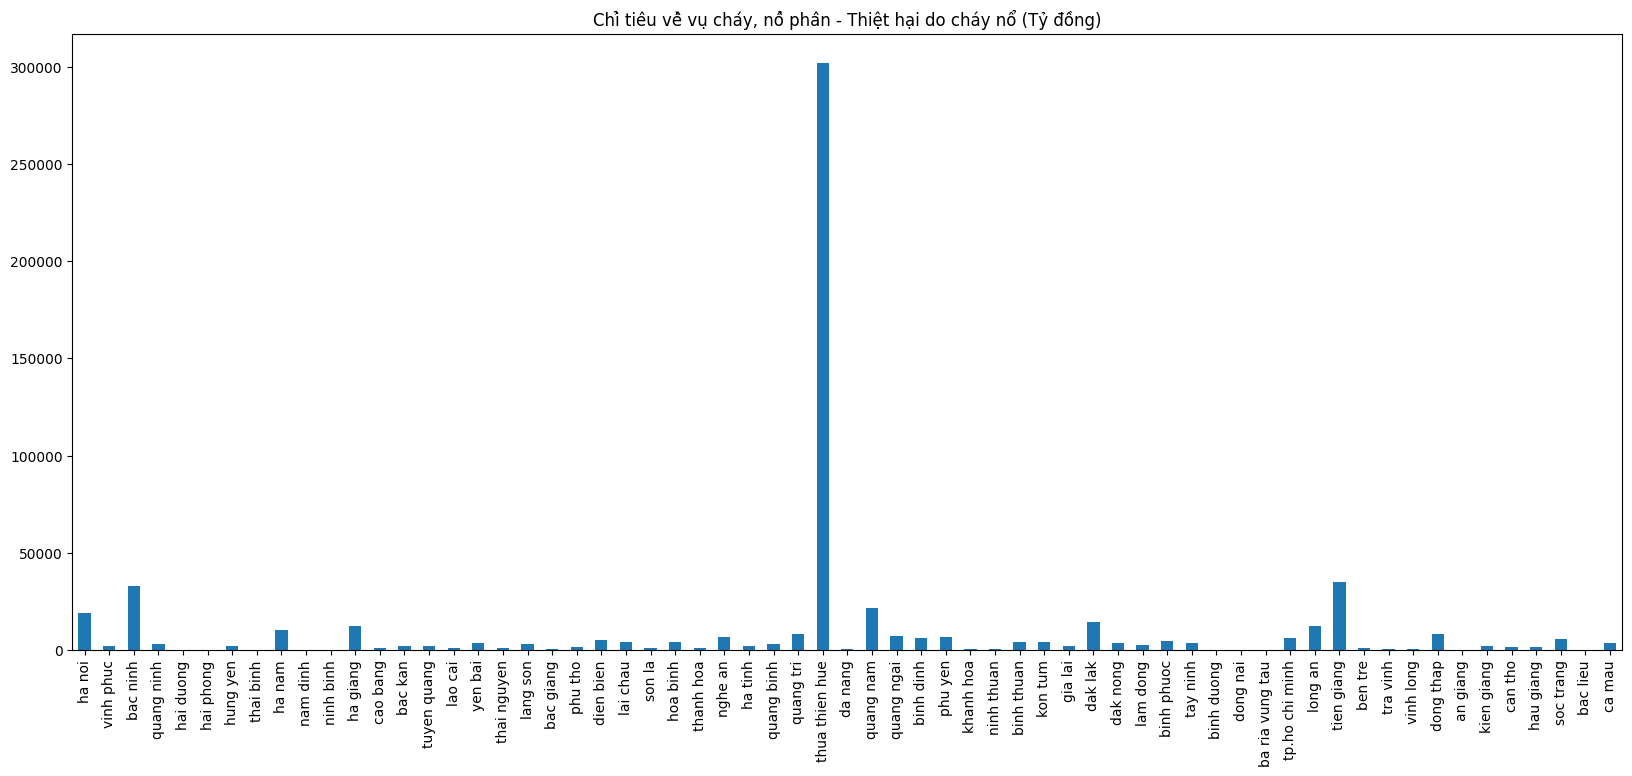

In [71]:
stacked_bar_plot(chay_p, 'Thiệt hại do cháy nổ (Tỷ đồng)', 2022, title='Chỉ tiêu về vụ cháy, nổ phân - Thiệt hại do cháy nổ (Tỷ đồng)')

In [72]:
describe_(chay_p, 'Thiệt hại do cháy nổ (Tỷ đồng)', 2022)

count        63.000000
mean       9410.619048
std       38090.553326
min           0.000000
25%         783.500000
50%        2260.000000
75%        5941.000000
max      301950.000000
Name: 2022, dtype: float64

In [73]:
province_with_max_value(chay_p, 'Thiệt hại do cháy nổ (Tỷ đồng)', [2022])

2022 thua thien hue Bắc Trung Bộ và duyên hải miền Trung


In [74]:
top_k_province_best_sub_feature(chay_p, 'Thiệt hại do cháy nổ (Tỷ đồng)', [2022], topk=10)

2022:
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 301950
tien giang, Đồng bằng sông Cửu Long: 34789
bac ninh, Đồng bằng sông Hồng: 33000
quang nam, Bắc Trung Bộ và duyên hải miền Trung: 21780
ha noi, Đồng bằng sông Hồng: 18796
dak lak, Tây Nguyên: 14598
ha giang, Trung du và miền núi phía Bắc: 12452
long an, Đồng bằng sông Cửu Long: 12200
ha nam, Đồng bằng sông Hồng: 10004
dong thap, Đồng bằng sông Cửu Long: 8270
------------------------------


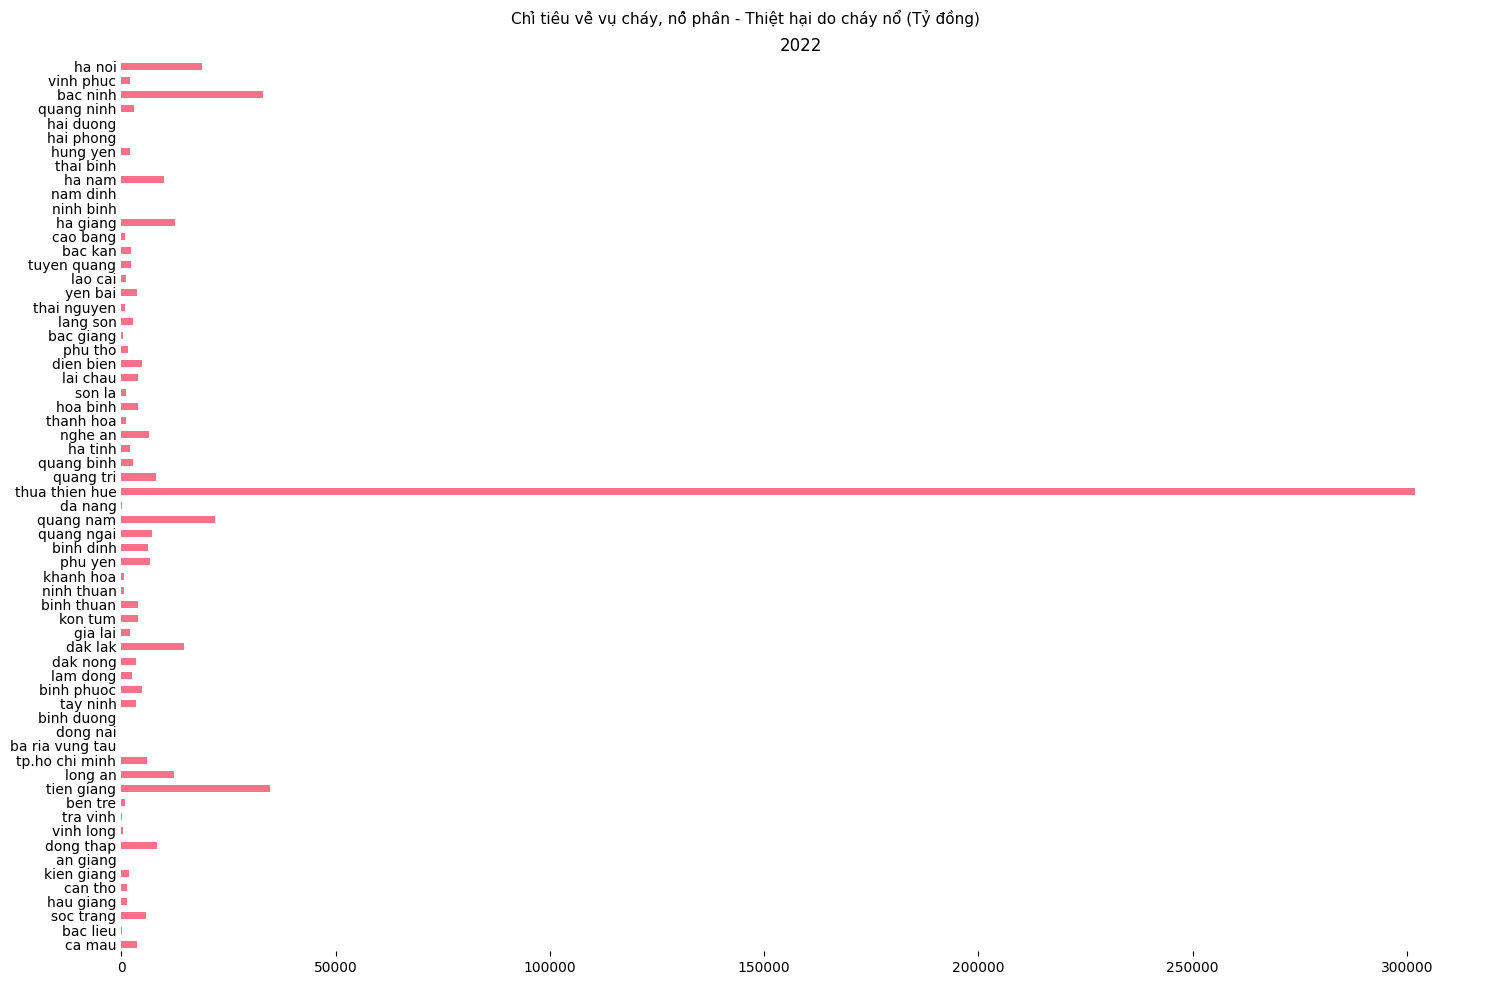

In [75]:
pannel_bar_plot(chay_p, 'Thiệt hại do cháy nổ (Tỷ đồng)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Thiệt hại do cháy nổ (Tỷ đồng)')
#pannel_bar_plot(chay_vm, 'Số vụ cháy, nổ (Vụ)', [2022], title='Chỉ tiêu về vụ cháy, nổ phân - Số vụ cháy, nổ')

###  Số vụ án và bị cáo đã xét xử sở thẩm phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu  -  ['Số vụ án đã bị khởi tố' 'Số bị can đã bị khởi tố']



In [76]:
vuan = preprocess_df(clcc.copy(), features[2], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-10-9a4f276e21d3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-10-9a4f276e21d3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-10-9a4f276e21d3>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh'

In [77]:
vuan.head(5)

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
498,Số vụ án và bị cáo đã xét xử sở t...,dong bang song hong,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17713,NaN
499,Số vụ án và bị cáo đã xét xử sở t...,ha noi,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6949,NaN
500,Số vụ án và bị cáo đã xét xử sở t...,vinh phuc,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046,NaN
501,Số vụ án và bị cáo đã xét xử sở t...,bac ninh,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339,NaN
502,Số vụ án và bị cáo đã xét xử sở t...,quang ninh,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435,NaN


In [78]:
vuan_p = vuan[vuan.Province.isin(province_name_preprocessed)]
vuan_vm = vuan[vuan.Province.isin(vung_mien_name_preprocessed)]

#### Số vụ án đã bị khởi tố

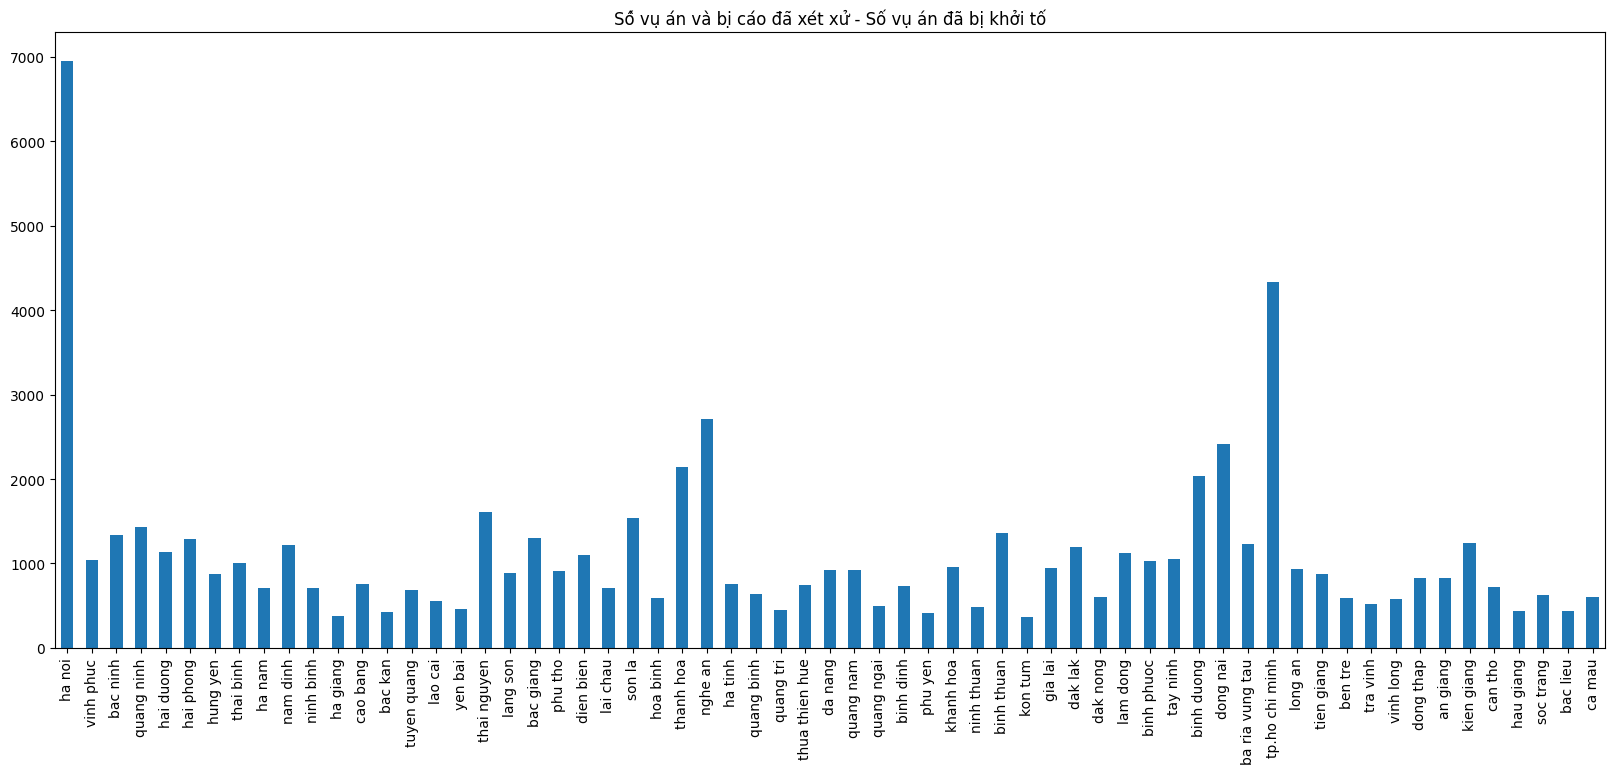

In [81]:
stacked_bar_plot(vuan_p, 'Số vụ án đã bị khởi tố', 2022, title='Số vụ án và bị cáo đã xét xử - Số vụ án đã bị khởi tố')

In [82]:
describe_(vuan_p, 'Số vụ án đã bị khởi tố', 2022)

count      63.000000
mean     1094.095238
std       986.529069
min       369.000000
25%       600.000000
50%       879.000000
75%      1207.500000
max      6949.000000
Name: 2022, dtype: float64

In [83]:
province_with_max_value(vuan_p, 'Số vụ án đã bị khởi tố', [2022])

2022 ha noi Đồng bằng sông Hồng


In [84]:
top_k_province_worst_sub_feature(vuan_p, 'Số vụ án đã bị khởi tố', [2022], topk=10)

2022:
kon tum, Tây Nguyên: 369
ha giang, Trung du và miền núi phía Bắc: 381
phu yen, Bắc Trung Bộ và duyên hải miền Trung: 414
bac kan, Trung du và miền núi phía Bắc: 425
hau giang, Đồng bằng sông Cửu Long: 439
bac lieu, Đồng bằng sông Cửu Long: 441
quang tri, Bắc Trung Bộ và duyên hải miền Trung: 454
yen bai, Trung du và miền núi phía Bắc: 461
ninh thuan, Bắc Trung Bộ và duyên hải miền Trung: 486
quang ngai, Bắc Trung Bộ và duyên hải miền Trung: 500
------------------------------


In [85]:
top_k_province_best_sub_feature(vuan_p, 'Số vụ án đã bị khởi tố', [2022], topk=10)

2022:
ha noi, Đồng bằng sông Hồng: 6949
tp.ho chi minh, Đông Nam Bộ: 4336
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 2715
dong nai, Đông Nam Bộ: 2418
thanh hoa, Bắc Trung Bộ và duyên hải miền Trung: 2144
binh duong, Đông Nam Bộ: 2037
thai nguyen, Trung du và miền núi phía Bắc: 1608
son la, Trung du và miền núi phía Bắc: 1535
quang ninh, Đồng bằng sông Hồng: 1435
binh thuan, Bắc Trung Bộ và duyên hải miền Trung: 1357
------------------------------


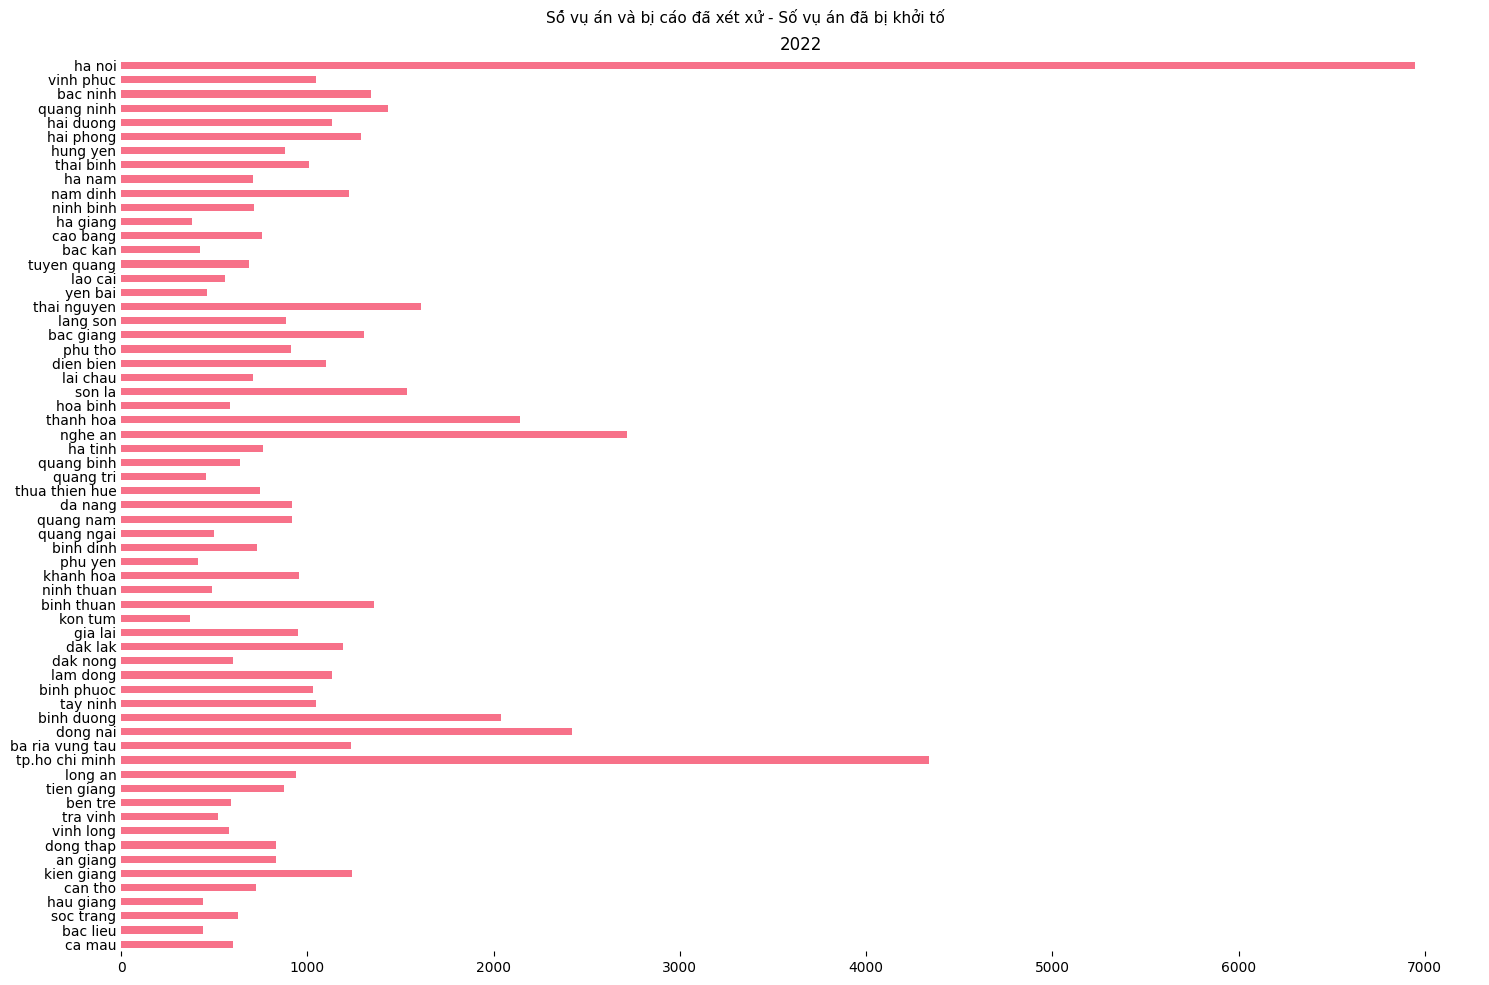

In [86]:
pannel_bar_plot(vuan_p, 'Số vụ án đã bị khởi tố', [2022], title='Số vụ án và bị cáo đã xét xử - Số vụ án đã bị khởi tố')

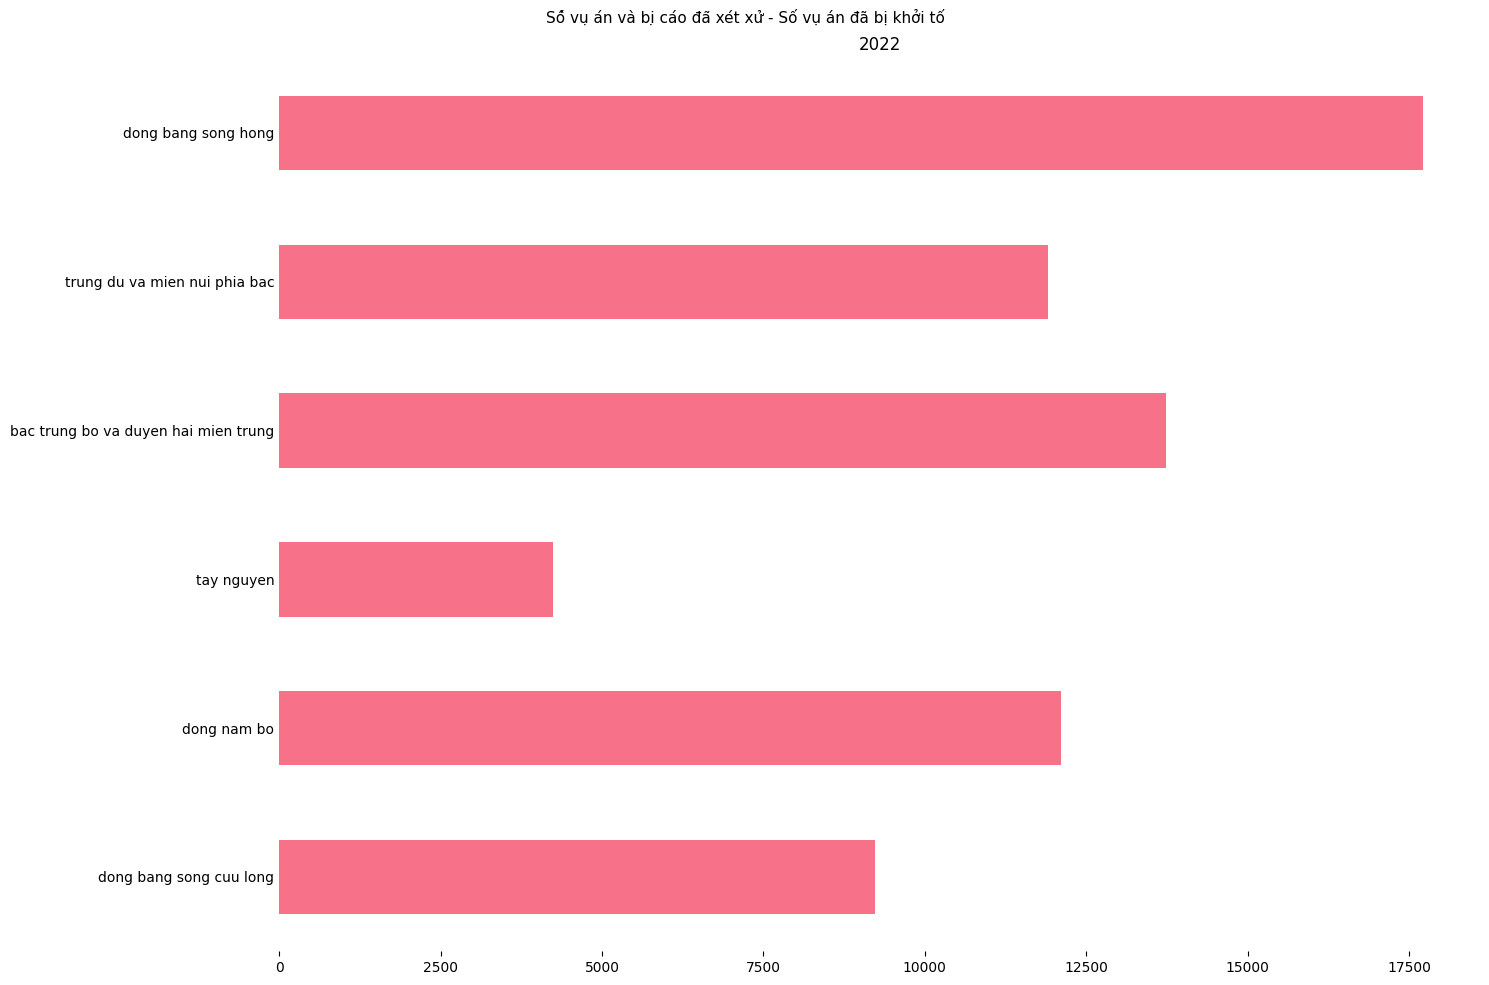

In [87]:
pannel_bar_plot(vuan_vm, 'Số vụ án đã bị khởi tố', [2022], title='Số vụ án và bị cáo đã xét xử - Số vụ án đã bị khởi tố')

#### Số bị can đã bị khởi tố

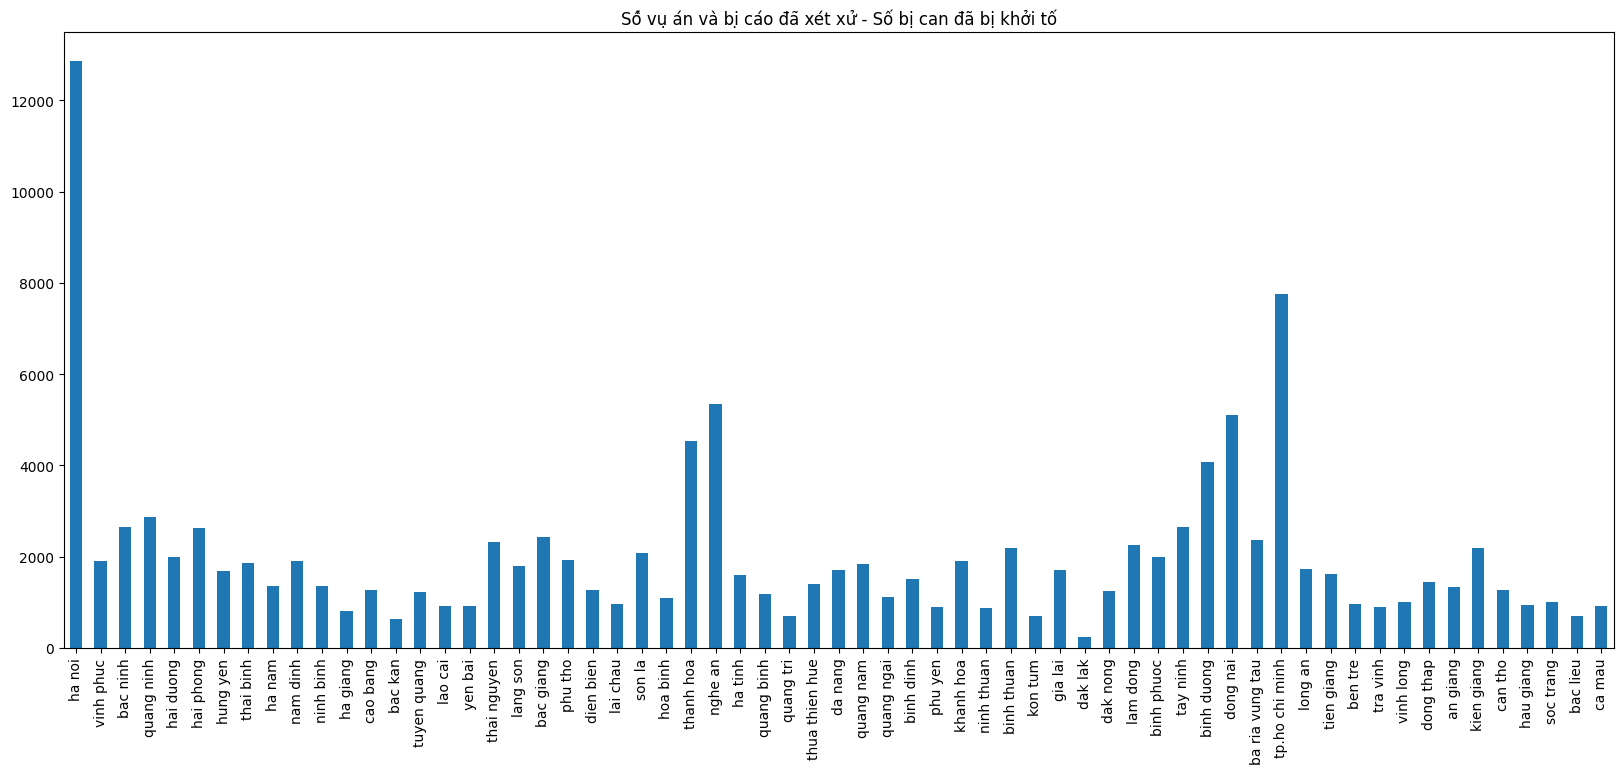

In [88]:
stacked_bar_plot(vuan_p, 'Số bị can đã bị khởi tố', 2022, title='Số vụ án và bị cáo đã xét xử - Số bị can đã bị khởi tố')

In [89]:
describe_(vuan_p, 'Số bị can đã bị khởi tố', 2022)

count       63.000000
mean      1994.507937
std       1871.693919
min        249.000000
25%       1012.000000
50%       1596.000000
75%       2126.000000
max      12859.000000
Name: 2022, dtype: float64

In [90]:
province_with_max_value(vuan_p, 'Số bị can đã bị khởi tố', [2022])

2022 ha noi Đồng bằng sông Hồng


In [91]:
top_k_province_best_sub_feature(vuan_p, 'Số bị can đã bị khởi tố', [2022], topk=10)

2022:
ha noi, Đồng bằng sông Hồng: 12859
tp.ho chi minh, Đông Nam Bộ: 7761
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 5349
dong nai, Đông Nam Bộ: 5110
thanh hoa, Bắc Trung Bộ và duyên hải miền Trung: 4530
binh duong, Đông Nam Bộ: 4085
quang ninh, Đồng bằng sông Hồng: 2862
tay ninh, Đông Nam Bộ: 2652
bac ninh, Đồng bằng sông Hồng: 2641
hai phong, Đồng bằng sông Hồng: 2633
------------------------------


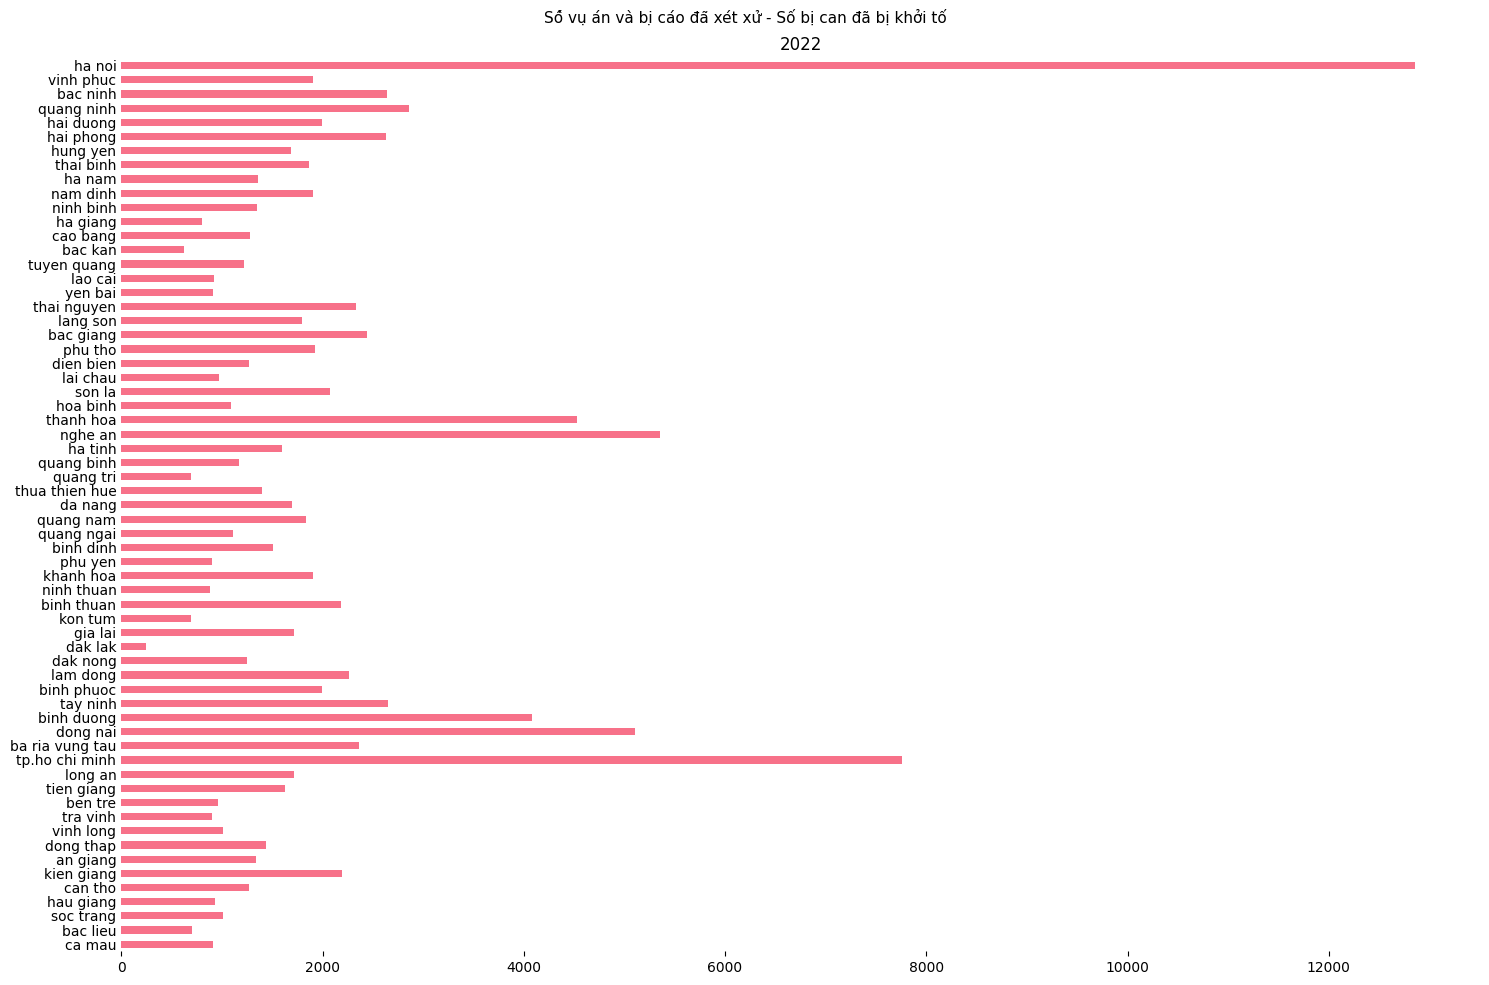

In [92]:
pannel_bar_plot(vuan_p, 'Số bị can đã bị khởi tố', [2022], title='Số vụ án và bị cáo đã xét xử - Số bị can đã bị khởi tố')

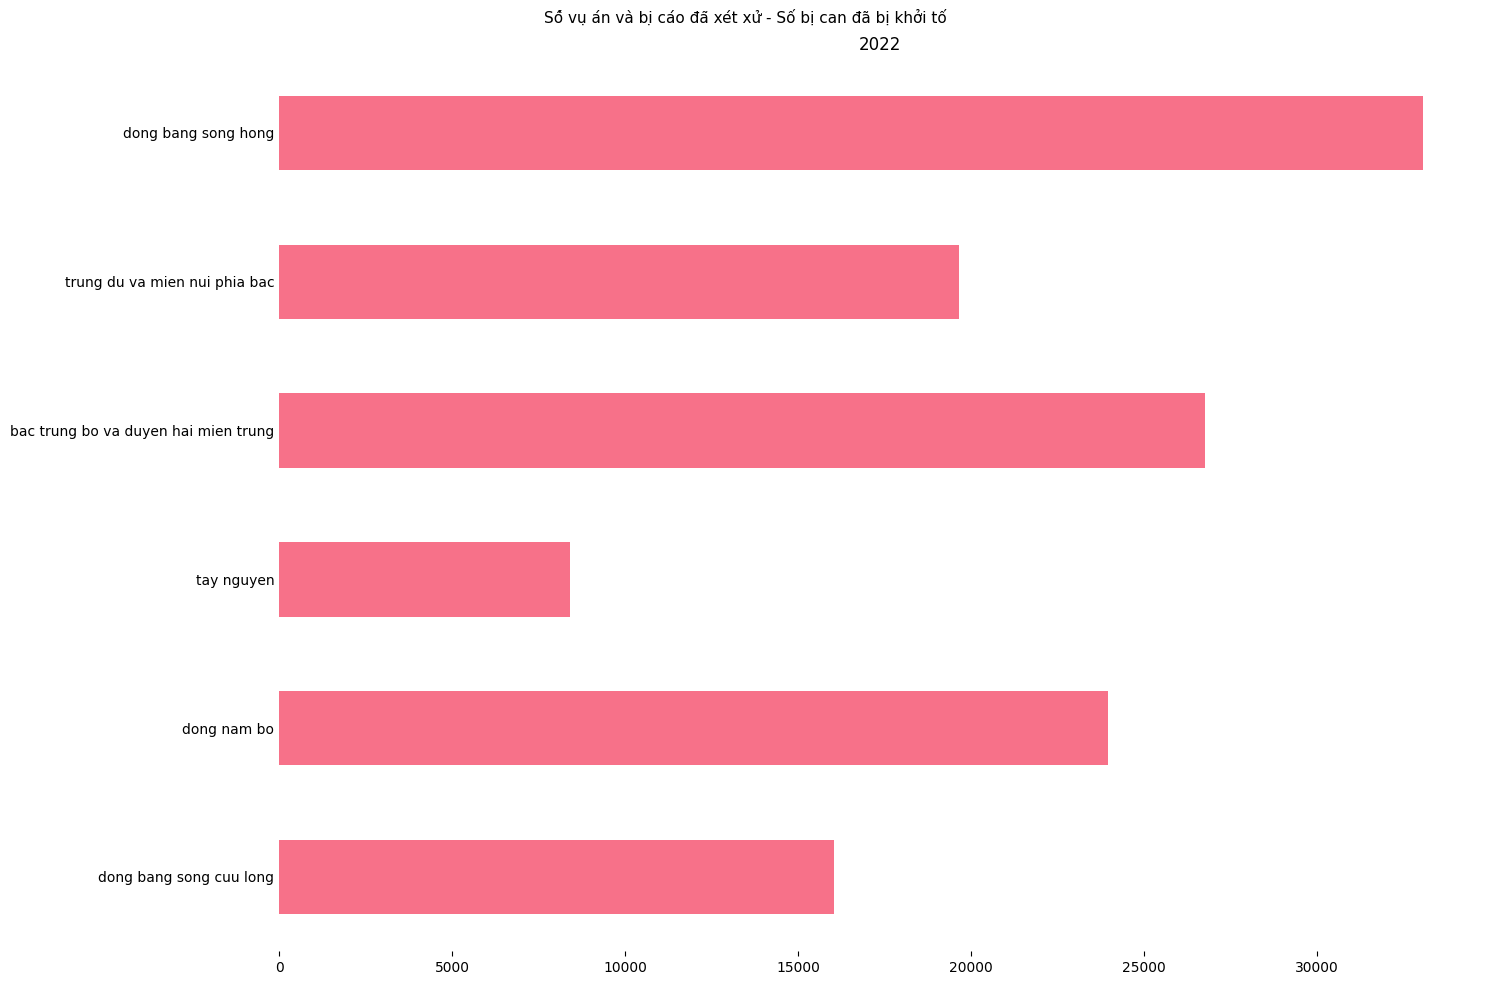

In [93]:
pannel_bar_plot(vuan_vm, 'Số bị can đã bị khởi tố', [2022], title='Số vụ án và bị cáo đã xét xử - Số bị can đã bị khởi tố')

### Độ tương quan

In [ ]:
tngt_p

In [ ]:
df_pivoted = tngt_p.pivot_table(index='Province', columns='Sub_Feature', values=tngt_p.columns[-2], aggfunc='first')
df_pivoted2 = chay_p.pivot_table(index='Province', columns='Sub_Feature', values=chay_p.columns[-2], aggfunc='first')
df_pivoted3 = vuan_p.pivot_table(index='Province', columns='Sub_Feature', values=vuan_p.columns[-2], aggfunc='first')



In [ ]:
df1 = df_pivoted
df2 = df_pivoted2
df3 = df_pivoted3

In [ ]:
merged_df = pd.merge(df1, df2, on='Province', how='inner')
final_merged_df = pd.merge(merged_df, df3, on='Province', how='inner')


In [ ]:
final_merged_df

In [ ]:
final = final_merged_df.rename(columns={
  'Số người bị thương': 'TNGT - Số người bị thương',
  'Số người chết': 'TNGT - Số người chết',
  'Số người bị thương (Người)':  'Cháy nổ - Số người bị thương (Người)',
  'Số người chết (người)': 'Cháy nổ - Số người chết (Người)'
})

In [ ]:
final

### HDI

In [ ]:
final_merged_df.to_csv()

In [ ]:
final_merged_df.to_csv('antt_no_remove.csv', encoding='utf-8', index=False)

In [ ]:
final1 = final1.drop("Thiệt hại do cháy nổ (Tỷ đồng)", axis=1)


In [ ]:
final1

In [ ]:
final1.to_csv('antt.csv', encoding='utf-8', index=False)


In [ ]:
final_merged_df4.corr()


In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(final_merged_df4.corr(), cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.2f', linewidths=.5)
plt.show()

In [ ]:
tngt_p

In [ ]:
years_model = ['2018', '2019', '2020', '2022']
def extract_feature(df, sub_feature, years):
    if sub_feature is not None:
        return df[(df.Province.isin(province_name_preprocessed)) & (df.Sub_Feature == sub_feature)][years].values
    else:
        return df[df.Province.isin(province_name_preprocessed)][years].values

In [ ]:
df_final = final_merged_df4.copy()

In [ ]:
import pandas as pd

# ... (đoạn code khác)

f = ['Số vụ TNGT', 'Số người chết', 'Số người bị thương']

features_model = []

for i, value in enumerate(f):
    # Trích xuất feature
    feature_model = extract_feature(tngt_p, value, years_model)

    # Tạo DataFrame tạm thời từ feature_model
    temp_df = pd.DataFrame(feature_model, columns=years_model)

    # Reindex để thêm những cột còn thiếu vào DataFrame
    temp_df = temp_df.reindex(columns=['2018', '2019', '2020', '2021'], fill_value=pd.NA)

    # Chuyển lại thành numpy array
    feature_model_with_nan = temp_df.values

    # Thêm vào danh sách chung
    features_model.append(feature_model_with_nan)

    # Gán biến global
    globals()[f"clcc_1_{i}_model"] = feature_model_with_nan




In [ ]:
f = ['Số vụ TNGT', 'Số người chết', 'Số người bị thương']
features_model = []
for i, value in enumerate(f):
    feature_model = extract_feature(tngt_p, value, years_model)
    globals()[f"clcc_1_{i}_model"] = feature_model
    features_model.append(feature_model)


In [ ]:
import pandas as pd

# ... (đoạn code khác)

f = [nuoc_vs_p, dien_p, dtns_p, hoxi_p, bietchu_p]
years_model = [2022, 2023, 2024]
features_model = []

for i, value in enumerate(f):
    feature_model = extract_feature(value, None, years_model)

    # Tạo DataFrame tạm thời từ feature_model
    temp_df = pd.DataFrame(feature_model, columns=years_model)

    # Reindex để thêm những cột còn thiếu vào DataFrame
    temp_df = temp_df.reindex(columns=['2018', '2019', '2020', '2021'], fill_value=pd.NA)

    # Chuyển lại thành numpy array
    feature_model_with_nan = temp_df.values

    # Thêm vào danh sách chung
    features_model.append(feature_model_with_nan)

# ... (đoạn code khác)


In [ ]:
f2 = ['Số vụ cháy, nổ (Vụ)', 'Số người chết (người)', 'Số người bị thương (Người)']
for i, value in enumerate(f2):
    feature_model = extract_feature(chay_p, value, years_model)
    globals()[f"clcc_2_{i}_model"] = feature_model
    features_model.append(feature_model)

In [ ]:
f3 = ['Số vụ án đã bị khởi tố', 'Số bị can đã bị khởi tố']
for i, value in enumerate(f3):
    feature_model = extract_feature(vuan_p, value, years_model)
    globals()[f"clcc_3_{i}_model"] = feature_model
    features_model.append(feature_model)

### Metrics

In [ ]:
### Create metric
score = []
for i in range(16):
    var = 'sc_' + str(i)
    score.append(locals()[var])
score.insert(1, sc_0_1)
name_col = ['fea_' + str(i) for i in range(16)]
name_col.insert(1, 'fea_0_1')
lvt_metric_df = pd.DataFrame(score).transpose()

In [ ]:
name_col = df_final.columns


In [ ]:
province_name_preprocessed

In [ ]:
df_final.head()


In [ ]:
weights = [0.1 for i in range(10)]

In [ ]:
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [ ]:
lvt_metric_df = df_final.copy()
lvt_metric_df = lvt_metric_df.reset_index()

In [ ]:
lvt_metric_df

In [ ]:
lvt_metric_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
col_fea = lvt_metric_df.columns.drop(['Province', 'HDI'])
scaler = MinMaxScaler()
lvt_metric_df[col_fea] = scaler.fit_transform(lvt_metric_df[col_fea])

In [ ]:
len(col_fea)

In [ ]:
lvt_metric_df_weighted

In [ ]:
lvt_metric_df_weighted = lvt_metric_df[col_fea] * weights
lvt_metric_df['score'] = lvt_metric_df_weighted.mean(axis=1)
scaler = MinMaxScaler()
lvt_metric_df['score'] = scaler.fit_transform(lvt_metric_df['score'].values.reshape(-1,1))

In [ ]:
lvt_metric_df

In [ ]:
lvt_metric_df[['Province', 'score']].to_csv('antt_metric_result.csv', index=False)


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(lvt_metric_df.Province, lvt_metric_df.score)
ax.set_xticklabels(lvt_metric_df.Province, rotation=90)

In [ ]:

plt.show()


In [ ]:
find_cluster('lai chau')



In [ ]:
score_df = lvt_metric_df[['Province', 'score']]
score_df[score_df.score > 0.4]

In [ ]:
lvt_metric_df[['Province', 'score']]

In [ ]:
lvt_metric_df2 = lvt_metric_df.drop('HDI')

In [ ]:
final = lvt_metric_df.drop('HDI',axis=1)
final

In [ ]:
print(final.corr()['score'])

In [ ]:
final.T

In [ ]:
final['Province']

In [ ]:
final2 = final.T

final2.colums = final['Province']
final2.head()

In [ ]:
final2.index

In [ ]:
|df_transposed = final2.reset_index(drop=True)
df_transposed

In [ ]:
final2.to_csv('final.csv', encoding='utf-8', index=False)


In [ ]:
final2 = pd.read_csv('/content/final.csv')
final2

In [ ]:
final = lvt_metric_df[['Province', 'Số người bị thương', 'Số người chết', 'Số vụ TNGT',
       'Số người bị thương (Người)', 'Số người chết (người)',
       'Số vụ cháy, nổ (Vụ)', 'Thiệt hại do cháy nổ (Tỷ đồng)',
       'Số bị can đã bị khởi tố', 'Số vụ án đã bị khởi tố', 'score']]

In [ ]:
a = final.T


In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(lvt_metric_df[].corr(), cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.2f', linewidths=.5)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(score_df)


In [ ]:
score_df

In [ ]:
pannel_bar_plot(score_df, None, ['score'], title='Chỉ tiêu phát triển con người tính theo toàn bộ thuộc tính của độ đo an ninh trật tự')

#### Số vụ TNGT

In [ ]:
province_with_max_value(score_df, None, ['score'])

In [ ]:
def top_k_province_worst_sub_feature(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=True).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=False).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)

In [ ]:
top_k_province_best_sub_feature(score_df, None, ['score'], topk=10)

In [ ]:
top_k_province_worst_sub_feature(score_df, None, ['score'], topk=10)

In [ ]:
describe_(score_df, None, 'score')

In [ ]:
top_k_province_worst_sub_feature(score_df, None, ['score'], topk=10)

In [ ]:
pannel_bar_plot(tngt_p, 'Số vụ TNGT', [2022], title='Chỉ tiêu về tai nạn giao thông - Số vụ TNGT')

In [ ]:
pannel_bar_plot(tngt_vm, 'Số vụ TNGT', [2022], title='Chỉ tiêu về tai nạn giao thông - Số vụ TNGT')

In [ ]:
describe_()

## Test

In [ ]:
import pandas as pd

In [ ]:
t = final.copy()
t.head()

In [ ]:
t['Năm']=2022

In [ ]:
t.columns

In [ ]:
import seaborn as sns


In [ ]:
col = ['TNGT - Số người bị thương', 'TNGT - Số người chết', 'Số vụ TNGT',
       'Cháy nổ - Số người bị thương (Người)',
       'Cháy nổ - Số người chết (Người)', 'Số vụ cháy, nổ (Vụ)',
       'Thiệt hại do cháy nổ (Tỷ đồng)', 'Số bị can đã bị khởi tố',
       'Số vụ án đã bị khởi tố', 'Năm']

In [ ]:
col

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming t is your DataFrame and col is the list of column names
col = ['TNGT - Số người bị thương', 'TNGT - Số người chết', 'Số vụ TNGT',
       'Cháy nổ - Số người bị thương (Người)',
       'Cháy nổ - Số người chết (Người)', 'Số vụ cháy, nổ (Vụ)',
       'Thiệt hại do cháy nổ (Tỷ đồng)', 'Số bị can đã bị khởi tố',
       'Số vụ án đã bị khởi tố', 'Năm']

# Assuming t is your DataFrame
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

for i, ax in enumerate(axes[:len(col) - 1]):  # Exclude 'Năm' column
    sns.boxplot(x='Năm', y=col[i], data=t, ax=ax)
    ax.set_title(col[i], fontsize=10)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming t is your DataFrame and col is the list of column names
col = ['TNGT - Số người bị thương', 'TNGT - Số người chết', 'Số vụ TNGT',
       'Cháy nổ - Số người bị thương (Người)',
       'Cháy nổ - Số người chết (Người)', 'Số vụ cháy, nổ (Vụ)',
       'Thiệt hại do cháy nổ (Tỷ đồng)', 'Số bị can đã bị khởi tố',
       'Số vụ án đã bị khởi tố', 'Năm']

# Assuming t is your DataFrame
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 15))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array
custom_palette = sns.color_palette("husl", len(col) - 1)  # Using the 'husl' color space

for i, ax in enumerate(axes[:len(col) - 1]):  # Exclude 'Năm' column
    sns.violinplot(x='Năm', y=col[i], data=t, ax=ax, palette=custom_palette)
    ax.set_title(col[i], fontsize=10)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming t is your DataFrame and col is the list of column names
col = ['TNGT - Số người bị thương', 'TNGT - Số người chết', 'Số vụ TNGT',
       'Cháy nổ - Số người bị thương (Người)',
       'Cháy nổ - Số người chết (Người)', 'Số vụ cháy, nổ (Vụ)',
       'Thiệt hại do cháy nổ (Tỷ đồng)', 'Số bị can đã bị khởi tố',
       'Số vụ án đã bị khởi tố', 'Năm']

# Assuming t is your DataFrame
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(col) - 1)  # Using the 'husl' color space

for i, ax in enumerate(axes[:len(col) - 1]):  # Exclude 'Năm' column
    sns.boxplot(x='Năm', y=col[i], data=t, ax=ax, palette=custom_palette)
    ax.set_title(col[i], fontsize=10)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
fig = plt.gcf()
fig.set_size_inches(5,5)
__ = sns.violinplot(x='Năm', y='TNGT - Số người chết',data=t, size = 20)

In [ ]:
t['nam2'] = 2022

In [ ]:
t[['tinh', 'nuoc_sach']].boxplot(by="tinh", figsize=(12, 6))

In [ ]:
clcc

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
0,Một số chỉ tiêu về tai nạn giao thôn...,TỔNG SỐ,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.457,NaN
1,Một số chỉ tiêu về tai nạn giao thôn...,Đồng bằng sông Hồng,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.862,NaN
2,Một số chỉ tiêu về tai nạn giao thôn...,Hà Nội,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812,NaN
3,Một số chỉ tiêu về tai nạn giao thôn...,Vĩnh Phúc,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN
4,Một số chỉ tiêu về tai nạn giao thôn...,Bắc Ninh,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,Số vụ án và bị cáo đã xét xử sở t...,Hậu Giang,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,934,NaN
635,Số vụ án và bị cáo đã xét xử sở t...,Sóc Trăng,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013,NaN
636,Số vụ án và bị cáo đã xét xử sở t...,Bạc Liêu,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708,NaN
637,Số vụ án và bị cáo đã xét xử sở t...,Cà Mau,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,911,NaN


In [ ]:
clcc.columns

Index(['Main_Feature',     'Province',  'Sub_Feature',           2002,
                 2003,           2004,           2005,           2006,
                 2007,           2008,           2009,           2010,
                 2011,           2012,           2013,           2014,
                 2015,           2016,           2017,           2018,
                 2019,           2020,           2021,   'Sơ bộ 2021',
                 2022,   'Sơ bộ 2022'],
      dtype='object')

In [ ]:
old = ['Main_Feature',     'Province',  'Sub_Feature',           2002,
                 2003,           2004,           2005,           2006,
                 2007,           2008,           2009,           2010,
                 2011,           2012,           2013,           2014,
                 2015,           2016,           2017,           2018,
                 2019,           2020,           2021,   'Sơ bộ 2021',
                 2022,   'Sơ bộ 2022']

new = ['Main_Feature',     'Province',  'Sub_Feature',           '2002',
                 2003,           2004,           2005,           2006,
                 2007,           2008,           2009,           2010,
                 2011,           2012,           2013,           2014,
                 2015,           2016,           2017,           2018,
                 2019,           2020,           2021,   'Sơ bộ 2021',
                 2022,   'Sơ bộ 2022']

In [ ]:
clcc.rename(columns={2002:'2002',
                 2003:'2003',           2004:'2004',           2005:'2005',           2006:'2006',
                 2007:'2007',           2008:'2008',           2009:'2009',           2010:'2010',
                 2011:'2011',           2012:'2012',           2013:'2013',           2014:'2014',
                 2015:'2015',           2016:'2016',           2017:'2017',           2018:'2018',
                 2019:'2019',           2020:'2020',           2021:'2021',   2022:'2022'},inplace=True)

In [ ]:

def extract_feature(df, sub_feature, years):
    if sub_feature is not None:
        return df[(df.Province.isin(province_name_preprocessed)) & (df.Sub_Feature == sub_feature)][years].values
    else:
        return df[df.Province.isin(province_name_preprocessed)][years].values

In [ ]:
tngt_p

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
2,Một số chỉ tiêu về tai nạn giao thôn...,ha noi,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812,NaN
3,Một số chỉ tiêu về tai nạn giao thôn...,vinh phuc,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN
4,Một số chỉ tiêu về tai nạn giao thôn...,bac ninh,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,NaN
5,Một số chỉ tiêu về tai nạn giao thôn...,quang ninh,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN
6,Một số chỉ tiêu về tai nạn giao thôn...,hai duong,Số vụ TNGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Một số chỉ tiêu về tai nạn giao thôn...,can tho,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN
208,Một số chỉ tiêu về tai nạn giao thôn...,hau giang,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN
209,Một số chỉ tiêu về tai nạn giao thôn...,soc trang,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186,NaN
210,Một số chỉ tiêu về tai nạn giao thôn...,bac lieu,Số người bị thương,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN


In [ ]:
chay_p

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
215,"Một số chỉ tiêu về vụ cháy, nổ pha...",ha noi,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387,NaN
216,"Một số chỉ tiêu về vụ cháy, nổ pha...",vinh phuc,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN
217,"Một số chỉ tiêu về vụ cháy, nổ pha...",bac ninh,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
218,"Một số chỉ tiêu về vụ cháy, nổ pha...",quang ninh,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN
219,"Một số chỉ tiêu về vụ cháy, nổ pha...",hai duong,"Số vụ cháy, nổ (Vụ)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,"Một số chỉ tiêu về vụ cháy, nổ pha...",can tho,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1273,NaN
492,"Một số chỉ tiêu về vụ cháy, nổ pha...",hau giang,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400,NaN
493,"Một số chỉ tiêu về vụ cháy, nổ pha...",soc trang,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5802,NaN
494,"Một số chỉ tiêu về vụ cháy, nổ pha...",bac lieu,Thiệt hại do cháy nổ (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN


In [ ]:
vuan_p

,Main_Feature,Province,Sub_Feature,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Sơ bộ 2021,2022,Sơ bộ 2022
499,Số vụ án và bị cáo đã xét xử sở t...,ha noi,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6949,NaN
500,Số vụ án và bị cáo đã xét xử sở t...,vinh phuc,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046,NaN
501,Số vụ án và bị cáo đã xét xử sở t...,bac ninh,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339,NaN
502,Số vụ án và bị cáo đã xét xử sở t...,quang ninh,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435,NaN
503,Số vụ án và bị cáo đã xét xử sở t...,hai duong,Số vụ án đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1131,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Số vụ án và bị cáo đã xét xử sở t...,can tho,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1274,NaN
634,Số vụ án và bị cáo đã xét xử sở t...,hau giang,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,934,NaN
635,Số vụ án và bị cáo đã xét xử sở t...,soc trang,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013,NaN
636,Số vụ án và bị cáo đã xét xử sở t...,bac lieu,Số bị can đã bị khởi tố,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708,NaN


In [ ]:
set(vuan_p.Sub_Feature.values)

{'Số bị can đã bị khởi tố', 'Số vụ án đã bị khởi tố'}

In [ ]:
set(chay_p.Sub_Feature.values)

{'Số người bị thương (Người)',
 'Số người chết (người)',
 'Số vụ cháy, nổ (Vụ)',
 'Thiệt hại do cháy nổ (Tỷ đồng)'}

In [ ]:
set(tngt_p.Sub_Feature.values)

{'Số người bị thương', 'Số người chết', 'Số vụ TNGT'}

In [ ]:
years = 2022

In [ ]:
set(chay_p.Sub_Feature.values)

{'Số người bị thương (Người)',
 'Số người chết (người)',
 'Số vụ cháy, nổ (Vụ)',
 'Thiệt hại do cháy nổ (Tỷ đồng)'}

In [ ]:
col = ['Số vụ TNGT', 'Số người chết', 'Số người bị thương', 'Số vụ cháy, nổ (Vụ)', 'Số người chết (người)', 'Số người bị thương (Người)', 'Thiệt hại do cháy nổ (Tỷ đồng)', 'Số vụ án đã bị khởi tố', 'Số bị can đã bị khởi tố']

In [ ]:
col35: 'số người bị thương(tngt)',
    36: 'số người chết (tngt)',
    37: 'số vụ tngt',
    38: 'số người bị thương(chayno)',
    39: 'số người chết (chayno)',
    40: 'số vụ chayno',
    41: 'thiệt hại do chayno',
    42: 'số bị can đã bị khởi tố',
    43: 'số vụ án đã bị khởi tố',

['Số vụ TNGT',
 'Số người chết',
 'Số người bị thương',
 'Số vụ cháy, nổ (Vụ)',
 'Số người chết (người)',
 'Số người bị thương (Người)',
 'Thiệt hại do cháy nổ (Tỷ đồng)',
 'Số vụ án đã bị khởi tố',
 'Số bị can đã bị khởi tố']

In [ ]:
sc2 = extract_feature(tngt_p, 'Số vụ TNGT', years)
sc1 = extract_feature(tngt_p, 'Số người chết', years)
sc0 = extract_feature(tngt_p, 'Số người bị thương', years)
sc5 = extract_feature(chay_p, 'Số vụ cháy, nổ (Vụ)', years )
sc4 = extract_feature(chay_p, 'Số người chết (người)', years )
sc3 = extract_feature(chay_p, 'Số người bị thương (Người)', years )
sc6 = extract_feature(chay_p, 'Thiệt hại do cháy nổ (Tỷ đồng)' , years )
sc8 = extract_feature(vuan_p, 'Số vụ án đã bị khởi tố', years )
sc7 = extract_feature(vuan_p, 'Số bị can đã bị khởi tố', years )



In [ ]:
years = ['2018',
                 '2019',           '2020',           '2021',   'Sơ bộ 2021',
                 '2022',   'Sơ bộ 2022']
def init_df(df, feature, vung_mien_name,province_name):
    new_df = preprocess_df(df, feature, vung_mien_name, province_name)
    print(new_df.Province.nunique())
    print(new_df.Sub_Feature.unique())
    print(new_df[years].isnull().sum())
    return new_df

In [ ]:
features_model = []
features_model = [sc0, sc1, sc2, sc3, sc4, sc5, sc6, sc7, sc8]

In [ ]:

for i in range(len(features)):
  feature_model = init_df(clcc.copy(), features[i], vung_mien_name, province_name)
  globals()[f"antt_{i}_model"] = feature_model
  features_model.append(feature_model)

features_model

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']
69
['Số vụ TNGT' 'Số người chết' 'Số người 

<ipython-input-11-9a4f276e21d3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-11-9a4f276e21d3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-11-9a4f276e21d3>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh'

[                                          Main_Feature             Province  \
 1    Một số chỉ tiêu về tai nạn giao thôn...  dong bang song hong   
 2    Một số chỉ tiêu về tai nạn giao thôn...               ha noi   
 3    Một số chỉ tiêu về tai nạn giao thôn...            vinh phuc   
 4    Một số chỉ tiêu về tai nạn giao thôn...             bac ninh   
 5    Một số chỉ tiêu về tai nạn giao thôn...           quang ninh   
 ..                                                 ...                  ...   
 207  Một số chỉ tiêu về tai nạn giao thôn...              can tho   
 208  Một số chỉ tiêu về tai nạn giao thôn...            hau giang   
 209  Một số chỉ tiêu về tai nạn giao thôn...            soc trang   
 210  Một số chỉ tiêu về tai nạn giao thôn...             bac lieu   
 211  Một số chỉ tiêu về tai nạn giao thôn...               ca mau   
 
             Sub_Feature  2002  2003  

In [ ]:
features_model

[array([ 573,   25,   31,   73,   68,   22,  121,   97,   74,   87,   91,
          10,   84,   44,   87,   63,  120,  125,   30,  186,   25,   17,
          42,   36,   96,  288,  101,   46,   95,  163,  329,   56,   91,
         149,   73,   97,   36,  149,  132,   42,  265,  118,   38,   73,
         100,   51,  463,  128,  376, 1321,   70,  194,   34,   18,  110,
          23,   16,   56,   17,   14,  186,   28,   31]),
 array([408,  30,  62,  51, 127,  51, 108,  60,  63,  45,  35,  19,  38,
         19,  36,  33,  46,  39,  40, 131,  53,  18,  21,  31,  71, 123,
        110,  91,  65, 102, 181,  56, 136, 102, 113,  79, 117,  50, 176,
         68, 242, 143,  34,  71, 135,  37, 316, 173, 251, 635,  80, 272,
        147,  36,  99,  78,  57,  85,  72,  59, 125,  21,  12]),
 array([ 812,   40,   84,   92,  157,   65,  148,  132,  120,  107,  105,
          20,   74,   41,   97,   66,  118,  136,   55,  267,   57,   25,
          47,   35,  100,  316,  159,  109,  117,  194,  433,   82,

In [ ]:
features_model

[array([ 573,   25,   31,   73,   68,   22,  121,   97,   74,   87,   91,
          10,   84,   44,   87,   63,  120,  125,   30,  186,   25,   17,
          42,   36,   96,  288,  101,   46,   95,  163,  329,   56,   91,
         149,   73,   97,   36,  149,  132,   42,  265,  118,   38,   73,
         100,   51,  463,  128,  376, 1321,   70,  194,   34,   18,  110,
          23,   16,   56,   17,   14,  186,   28,   31]),
 array([408,  30,  62,  51, 127,  51, 108,  60,  63,  45,  35,  19,  38,
         19,  36,  33,  46,  39,  40, 131,  53,  18,  21,  31,  71, 123,
        110,  91,  65, 102, 181,  56, 136, 102, 113,  79, 117,  50, 176,
         68, 242, 143,  34,  71, 135,  37, 316, 173, 251, 635,  80, 272,
        147,  36,  99,  78,  57,  85,  72,  59, 125,  21,  12]),
 array([ 812,   40,   84,   92,  157,   65,  148,  132,  120,  107,  105,
          20,   74,   41,   97,   66,  118,  136,   55,  267,   57,   25,
          47,   35,  100,  316,  159,  109,  117,  194,  433,   82,

In [ ]:
import pickle
with open('antt_fix_3.pkl', 'wb') as f:
    pickle.dump(features_model, f)